# <center>Майнор "Интеллектуальный анализ данных"</center>

# <center>Курс "Введение в анализ данных"</center>

# <center>Лабораторная работа №3. Supervised Learning</center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', 40)

pd.set_option('display.max_colwidth', None)

In [3]:
data_main = pd.read_csv("students_data.csv")

data_main.shape

(1044, 36)

In [4]:
data_main.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [5]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


## Часть 1. Предобработка данных

* Выполните необходимые преобразования данных: исправление ошибок, удаление выбросов и пропусков, приведение признаков к числовому виду.  
* Оцените значимость признаков для определения итоговой оценки за курс. Исключите из выборки незначимые на ваш взгляд признаки, обоснуйте свое решение. 
* (Опционально) Feature engineering: создайте новые признаки (значимые) на основе уже имеющихся.
  
**Tip:** Используйте свои наработки из Лабораторной работы №1.

In [6]:
import hashlib as hs

In [7]:
data = data_main.copy(deep = True)
data.head(10)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


In [8]:
data.loc[data['sex'] == 'm', 'sex'] = 'M'
data['sex'].value_counts()

F    591
M    453
Name: sex, dtype: int64

In [9]:
data.loc[data['Pstatus'] == 't', 'Pstatus'] = 'T'
data['Pstatus'].value_counts()

T    923
A    121
Name: Pstatus, dtype: int64

In [10]:
data.loc[data['Medu'] == 'o', 'Medu'] = '0'
data['Medu'].value_counts()

4    306
2    289
3    238
1    202
0      9
Name: Medu, dtype: int64

In [11]:
data.loc[data['Fedu'] == 'o', 'Fedu'] = '0'
data['Fedu'].value_counts()

2    324
1    256
3    231
4    224
0      9
Name: Fedu, dtype: int64

In [12]:
data.loc[data['Mjob'] == 'at-home', 'Mjob'] = 'at_home'
data['Mjob'].value_counts()

other       399
services    239
at_home     194
teacher     130
health       82
Name: Mjob, dtype: int64

In [13]:
data.loc[data['Fjob'] == 'at-home', 'Fjob'] = 'at_home'
data['Fjob'].value_counts()

other       584
services    292
teacher      65
at_home      62
health       41
Name: Fjob, dtype: int64

In [14]:
data.loc[data['guardian'] == 'futher', 'guardian'] = 'father'
data['guardian'].value_counts()

mother    728
father    243
other      73
Name: guardian, dtype: int64

In [15]:
data['cheating'].fillna('no', inplace=True)

In [16]:
data['romantic'].fillna('no', inplace=True)

In [17]:
data['famrel'].describe(include=['category'])
data['famrel'].fillna(4, inplace=True)

In [18]:
data['Dalc'].describe(include=['category'])
data['Dalc'].fillna(2, inplace=True)

In [19]:
data['Walc'].describe(include=['category'])
data['Walc'].fillna(2, inplace=True)

In [20]:
data_no_changes = data.copy(deep = True)

Признаки Walc и Dalc зависимы друг от друга, при этом есть наблюдение, что высокие значения обоих признаков сопутствуют низкой успеваемости. Объединим эти признаки в один.

In [21]:
data['alcohol'] = ' '
for i in range(data.shape[0]):
    if int(data.loc[i, 'Dalc']) >= 4 or int(data.loc[i, 'Walc']) >= 4:
        data.loc[i, 'alcohol'] = 1
    else:
        data.loc[i, 'alcohol'] = 0

In [22]:
data.drop(['Dalc', 'Walc'], axis=1, inplace=True)

Из предыдущей лабораторной мы видим, что работа родителей связана с их образованием, значит логично оставить только образование родителей. А также признак famrel тесно связан famsup

In [23]:
data.drop(['Mjob', 'Fjob', 'famsize'], axis=1, inplace=True)

ПРЕОБРАЗУЕМ ВСЕ ПРИЗНАКИ В ЧИСЛОВЫЕ И УДАЛИМ ВЫБРОСЫ.

In [24]:
data.head(10)

,ID,Subject,school,sex,age,address,Pstatus,Medu,Fedu,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,cheating,G1,G2,G3,alcohol
0,100097,Por,GP,F,16,U,A,3,4,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,5,12,no,15,13,14,1
1,101021,Por,GP,F,17,U,T,3,2,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,3,2,no,17,18,17,0
2,102965,Por,GP,M,16,U,T,1,2,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,5,0,yes,9,8,10,1
3,102989,Por,MS,M,17,U,T,2,3,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,3,4,no,14,15,16,0
4,103131,Por,GP,F,16,U,T,1,1,home,mother,2,1,0,no,yes,no,no,yes,yes,no,no,4.0,3,2,5,2,yes,12,13,13,1
5,103144,Por,GP,M,18,U,T,3,1,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4,2,no,11,11,12,1
6,105257,Por,MS,F,18,U,T,1,1,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,5,6,no,11,12,9,0
7,107639,Por,MS,F,15,R,T,4,4,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,5,0,no,13,14,14,1
8,107914,Math,GP,F,15,U,T,3,2,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,5,10,no,7,6,6,0
9,108089,Por,MS,M,16,R,T,3,4,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,5,4,no,9,10,11,0


Мы видим, что признаки G1, G2, G3 сильно коррелируют друг с другом, что будет нам мешать. Так как G3 мы будем предсказывать, то нам стоит удалить например G2. Также нетружно заметить, что признаки 'romantic', 'traveltime', 'health', 'nursery' практически не влияют на итоговую оценку ученика, поэтому их тоже можем игнорировать. Также 'goout' и 'freetime' довольно схожие признаки, оставим один из них. Удалим в итоге:

In [25]:
data.drop(['G2', 'romantic', 'traveltime', 'health', 'nursery', 'freetime'], axis=1, inplace=True) # axis=0 will do for rows

In [26]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [27]:
binar = ['Subject', 'school', 'sex', 'address', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities',
        'higher', 'internet', 'cheating']

for sign in binar:
    sign_enc = OrdinalEncoder()
    sign_enc.fit(data[[sign]])
    sign_bin = sign_enc.transform(data[[sign]])
    data.drop([sign], axis=1, inplace=True)
    data[sign_enc.categories_[0][1] + ' ' + sign] = sign_bin
    
data.head()

,ID,age,Medu,Fedu,reason,guardian,studytime,failures,famrel,goout,absences,G1,G3,alcohol,Por Subject,MS school,M sex,U address,T Pstatus,yes schoolsup,yes famsup,yes paid,yes activities,yes higher,yes internet,yes cheating
0,100097,16,3,4,course,father,1,0,3.0,1,12,15,14,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,101021,17,3,2,course,mother,2,0,5.0,4,2,17,17,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,102965,16,1,2,course,mother,1,2,4.0,5,0,9,10,1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,102989,17,2,3,home,father,2,0,4.0,3,4,14,16,0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,103131,16,1,1,home,mother,1,0,4.0,2,2,12,13,1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [28]:
ct = ColumnTransformer(
    [ 
        ('reason', OneHotEncoder(sparse=False), ['reason']),
        ('guardian', OneHotEncoder(sparse=False), ['guardian'])
    ],
    remainder='drop'
)
ct.fit(data)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('reason',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=False),
                                 ['reason']),
                                ('guardian',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=False),
                                 ['guardian'])],
                  verbose=False)

In [29]:
ct.get_feature_names()

['reason__x0_course',
 'reason__x0_home',
 'reason__x0_other',
 'reason__x0_reputation',
 'guardian__x0_father',
 'guardian__x0_mother',
 'guardian__x0_other']

In [30]:
X = pd.DataFrame(ct.transform(data),
                 columns=[x.replace('_x0', '') for x in ct.get_feature_names()])
X.head(10)

,reason__course,reason__home,reason__other,reason__reputation,guardian__father,guardian__mother,guardian__other
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [31]:
data.drop(['reason', 'guardian'], axis=1, inplace=True)
data = data.join(X)

data.head(10)

,ID,age,Medu,Fedu,studytime,failures,famrel,goout,absences,G1,G3,alcohol,Por Subject,MS school,M sex,U address,T Pstatus,yes schoolsup,yes famsup,yes paid,yes activities,yes higher,yes internet,yes cheating,reason__course,reason__home,reason__other,reason__reputation,guardian__father,guardian__mother,guardian__other
0,100097,16,3,4,1,0,3.0,1,12,15,14,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,101021,17,3,2,2,0,5.0,4,2,17,17,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,102965,16,1,2,1,2,4.0,5,0,9,10,1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,102989,17,2,3,2,0,4.0,3,4,14,16,0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,103131,16,1,1,1,0,4.0,2,2,12,13,1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,103144,18,3,1,1,0,3.0,4,2,11,12,1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,105257,18,1,1,2,0,1.0,1,6,11,9,0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,107639,15,4,4,1,0,1.0,1,0,13,14,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,107914,15,3,2,2,0,4.0,4,10,7,6,0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,108089,16,3,4,2,0,3.0,5,4,9,11,0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  1044 non-null   int64  
 1   age                 1044 non-null   int64  
 2   Medu                1044 non-null   object 
 3   Fedu                1044 non-null   object 
 4   studytime           1044 non-null   int64  
 5   failures            1044 non-null   int64  
 6   famrel              1044 non-null   float64
 7   goout               1044 non-null   int64  
 8   absences            1044 non-null   int64  
 9   G1                  1044 non-null   int64  
 10  G3                  1044 non-null   int64  
 11  alcohol             1044 non-null   object 
 12  Por Subject         1044 non-null   float64
 13  MS school           1044 non-null   float64
 14  M sex               1044 non-null   float64
 15  U address           1044 non-null   float64
 16  T Psta

In [33]:
np.shape(data)

(1044, 31)

In [34]:
data.drop(['ID'], axis=1, inplace=True) # axis=0 will do for rows
data.Medu = data.Medu.astype('int64')
data.Fedu = data.Fedu.astype('int64')
data.alcohol = data.alcohol.astype('int64')

In [35]:
#from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


# приведение в диапазон от 0 до 1
dg = data.copy(deep=True)
min_max_scaler = preprocessing.MinMaxScaler()

data = min_max_scaler.fit_transform(dg)
data = pd.DataFrame(data, columns=dg.columns)

data.head(10)

,age,Medu,Fedu,studytime,failures,famrel,goout,absences,G1,G3,alcohol,Por Subject,MS school,M sex,U address,T Pstatus,yes schoolsup,yes famsup,yes paid,yes activities,yes higher,yes internet,yes cheating,reason__course,reason__home,reason__other,reason__reputation,guardian__father,guardian__mother,guardian__other
0,0.142857,0.75,1.00,0.000000,0.000000,0.50,0.00,0.160000,0.789474,0.70,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.285714,0.75,0.50,0.333333,0.000000,1.00,0.75,0.026667,0.894737,0.85,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.142857,0.25,0.50,0.000000,0.666667,0.75,1.00,0.000000,0.473684,0.50,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.285714,0.50,0.75,0.333333,0.000000,0.75,0.50,0.053333,0.736842,0.80,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.142857,0.25,0.25,0.000000,0.000000,0.75,0.25,0.026667,0.631579,0.65,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0.428571,0.75,0.25,0.000000,0.000000,0.50,0.75,0.026667,0.578947,0.60,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.428571,0.25,0.25,0.333333,0.000000,0.00,0.00,0.080000,0.578947,0.45,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.000000,1.00,1.00,0.000000,0.000000,0.00,0.00,0.000000,0.684211,0.70,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.000000,0.75,0.50,0.333333,0.000000,0.75,0.75,0.133333,0.368421,0.30,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,0.142857,0.75,1.00,0.333333,0.000000,0.50,1.00,0.053333,0.473684,0.55,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


УДАЛЕНИЕ ВЫБРОСОВ

In [36]:
from sklearn.metrics import pairwise_distances
from scipy.spatial import distance
import numpy as np

In [37]:
 
def _getAplus(A): # если матрица неположительно определена, эта функция (nearPD) вычислит максимально приближенную положительно 
    eigval, eigvec = np.linalg.eig(A) # определенную матрицу для данной матрицы
    Q = np.matrix(eigvec)
    xdiag = np.matrix(np.diag(np.maximum(eigval, 0)))
    return Q*xdiag*Q.T


def _getPs(A, W=None):
    W05 = np.matrix(W**.5)
    return  W05.I * _getAplus(W05 * A * W05) * W05.I


def _getPu(A, W=None):
    Aret = np.array(A.copy())
    Aret[W > 0] = np.array(W)[W > 0]
    return np.matrix(Aret)


def nearPD(A, nit=10):
    n = A.shape[0]
    W = np.identity(n) 
# W is the matrix used for the norm (assumed to be Identity matrix here)
# the algorithm should work for any diagonal W
    deltaS = 0
    Yk = A.copy()
    for k in range(nit):
        Rk = Yk - deltaS
        Xk = _getPs(Rk, W=W)
        deltaS = Xk - Rk
        Yk = _getPu(Xk, W=W)
    return Yk


In [38]:
def MahalanobisDist(data, verbose=False):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix) is False:
        covariance_matrix = nearPD(covariance_matrix)
        
    inv_covariance_matrix = np.linalg.inv(covariance_matrix) #инверсная матрица ковараиции
    if is_pos_def(inv_covariance_matrix) is False:
        inv_covariance_matrix = nearPD(inv_covariance_matrix)


    vars_mean = [] #ищем среднее значение переменных для каждого объекта и сохраняем в массиве
    for i in range(data.shape[0]):
        vars_mean.append(list(data.mean(axis=0)))
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i]))) 
        
    if verbose:
        print("Mahalanobis Distance:\n {}\n".format(md))
        return md 

In [39]:
def MD_detectOutliers(data, extreme=False, verbose=False):
    MD = MahalanobisDist(data, verbose)
  

    std = np.std(MD)
    k = 4. * std if extreme else 3. * std
    m = np.mean(MD)
    up_t = m + k
    low_t = m - k
    outliers = []
    for i in range(len(MD)):
        if (MD[i] >= up_t) or (MD[i] <= low_t):
            outliers.append(i)  # index of the outlier
    return np.array(outliers)

In [40]:
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

In [41]:
outliers = np.array(data)

outliers_indices = MD_detectOutliers(outliers, verbose=True)


print("Outliers Indices: {}\n".format(outliers_indices))
print("Outliers:")
for ii in outliers_indices:
    print(outliers[ii])

Mahalanobis Distance:
 [matrix([[2.79445777e-25-21259596.77133984j]]), matrix([[6.93415908e-26+13490534.75108856j]]), matrix([[9.43027791e-25+13490534.75108846j]]), matrix([[1.13590513e-26-23410028.32334193j]]), matrix([[2.99659667e-25+16674936.25445187j]]), matrix([[7.21541654e-25+13490534.75108855j]]), matrix([[1.1036752e-24+13490534.75108854j]]), matrix([[4.22954824e-25+13490534.75108851j]]), matrix([[3.87798152e-25+16841565.3369323j]]), matrix([[8.07343291e-25-19021720.68220617j]]), matrix([[8.75037333e-26+21259596.77133987j]]), matrix([[1.72207136e-25+16674936.25445194j]]), matrix([[6.64645792e-25+16841565.33693228j]]), matrix([[5.21247687e-26-16674936.25445193j]]), matrix([[4.41189473e-25-13490534.75108847j]]), matrix([[4.03469002e-25+21259596.77133985j]]), matrix([[8.57712269e-25+16674936.25445193j]]), matrix([[8.40356957e-25+13490534.75108854j]]), matrix([[1.22663605e-25+13490534.75108847j]]), matrix([[6.04641917e-25+16841565.33693225j]]), matrix([[3.81551068e-25+13490534.75108

Выбросов нет

In [42]:
data.drop(outliers_indices, inplace=True) # axis=0 will do for rows по умолчанию

In [43]:
data.reset_index(drop=True, inplace=True)

## Часть 2. Регрессия

* Решите задачу регрессии: постройте модель, предсказывающую итоговую оценку, которую получит студент по предмету (`G3`). При решении задачи **нельзя** использовать признак `G2`.  
<br>  
* При решении задачи используйте различные методы, которые рассматривались на занятиях:  
  * Линейная регрессия + регуляризации;  
  * Полиномиальная регрессия;  
  * KNN и  Radius Neighbors;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
<br>    
* Оцените качество каждой модели, используйте различные метрики. Сравните модели и сделайте вывод о качестве решения задачи.  
<br>    
* Задачу необходимо решить в двух вариантах: с использованием признака `G1`  и без него. Сравните качество решений в двух случаях.  
<br>    
* В регрессионных моделях попробуйте дать интерпретацию весам признаков. 

In [44]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import numpy as np
import pandas as pd

from sklearn import metrics

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# стиль seaborn
# style.available выводит все доступные стили
from matplotlib import style
style.use('seaborn')

#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

### Все с G1

In [45]:
(trainData, 
 testData, 
 trainDependentVariables, 
 testDependentVariables) = train_test_split(data.drop('G3', axis=1),
                                            data['G3'],
                                            test_size=0.3, 
                                            random_state=5)

In [46]:
trainData.shape

(730, 29)

In [47]:
testData.shape

(314, 29)

In [48]:
trainDependentVariables.shape

(730,)

In [49]:
testDependentVariables.shape

(314,)

### Линейная регрессия

In [50]:
%%time

regressionModel = linear_model.LinearRegression()
regressionModel.fit(trainData, trainDependentVariables)

Wall time: 7.95 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
predictedDependentVariables = regressionModel.predict(testData)

In [52]:
predictedDependentVariables

array([0.61669922, 0.53918457, 0.83581543, 0.67041016, 0.67736816,
       0.47424316, 0.63220215, 0.8659668 , 0.50500488, 0.8013916 ,
       0.52990723, 0.49279785, 0.6484375 , 0.47436523, 0.57092285,
       0.82971191, 0.33679199, 0.53051758, 0.5534668 , 0.58496094,
       0.63757324, 0.53674316, 0.49206543, 0.58642578, 0.5723877 ,
       0.74206543, 0.6829834 , 0.55700684, 0.8416748 , 0.47802734,
       0.79211426, 0.43945312, 0.52429199, 0.23632812, 0.52429199,
       0.23535156, 0.75341797, 0.29577637, 0.25500488, 0.28479004,
       0.30895996, 0.66906738, 0.51672363, 0.65881348, 0.91003418,
       0.48791504, 0.38085938, 0.23254395, 0.59887695, 0.33557129,
       0.33972168, 0.72460938, 0.64001465, 0.82727051, 0.35754395,
       0.62731934, 0.59973145, 0.46813965, 0.30310059, 0.79309082,
       0.27258301, 0.59777832, 0.5838623 , 0.77380371, 0.61425781,
       0.60388184, 0.65612793, 0.34265137, 0.55651855, 0.50830078,
       0.45788574, 0.62976074, 0.89978027, 0.55761719, 0.51953

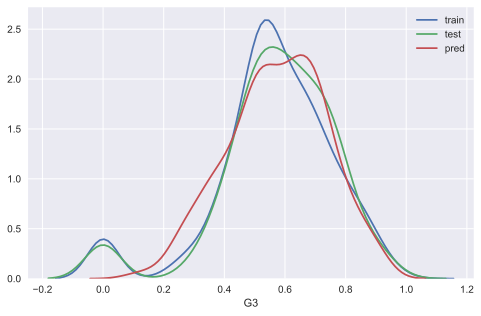

In [53]:
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(predictedDependentVariables, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

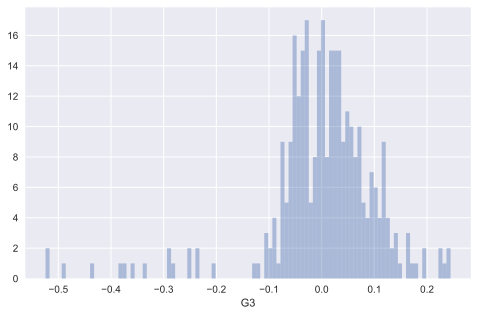

In [54]:
error = testDependentVariables - predictedDependentVariables
sns.distplot(error, bins=100, kde=False)
plt.show()

In [55]:
def calc_metrics(true, pred):
    mse = metrics.mean_squared_error(true, pred)

    rmse = np.sqrt(mse)

    mae = metrics.mean_absolute_error(true, pred)

    medae = metrics.median_absolute_error(true, pred)

    R2 = metrics.r2_score(true, pred)

    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))

In [56]:
calc_metrics(testDependentVariables, predictedDependentVariables)

MSE:   0.01140908463935184
RMSE:  0.10681331676973542
R2:    0.6842502360350491
MAE:   0.07044351176851114
MedAE: 0.04863281249999998


Достаточно небольшая ошибка в данной модели. Основная часть ошибок приходится на предсказывание оценок вблизи нуля, поэтому посмотрим еще регуляризацию.

In [57]:
calc_metrics(trainDependentVariables, regressionModel.predict(trainData))

MSE:   0.011930091986917473
RMSE:  0.10922496045738572
R2:    0.6840563138607172
MAE:   0.0752980522260274
MedAE: 0.052551269531249944


In [58]:
coefs = pd.Series(regressionModel.coef_, 
                  index=trainData.columns)

x = abs(coefs).sort_values(ascending=False)
coefs[x.index]

guardian__father     -1.470953e+12
guardian__other      -1.470953e+12
guardian__mother     -1.470953e+12
reason__reputation    4.475084e+11
reason__course        4.475084e+11
reason__other         4.475084e+11
reason__home          4.475084e+11
G1                    9.662947e-01
absences              1.244692e-01
failures             -6.462514e-02
Por Subject           5.734401e-02
yes schoolsup         2.318966e-02
U address             2.040489e-02
age                   1.650784e-02
yes paid              1.554372e-02
studytime            -1.457188e-02
yes cheating         -1.347336e-02
famrel                1.223871e-02
goout                -1.127046e-02
T Pstatus            -1.101723e-02
yes internet          8.086695e-03
MS school             6.238664e-03
yes higher            5.315986e-03
M sex                -4.653960e-03
Fedu                 -3.165185e-03
alcohol              -2.787632e-03
yes activities       -2.613604e-03
yes famsup            2.613555e-03
Medu                

Коэффициенты говорят нам о том, что модель переобучилась.

#### Регуляризация

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
house_scaler = StandardScaler()
trainData = pd.DataFrame(house_scaler.fit_transform(trainData), columns=trainData.columns)
testData = pd.DataFrame(house_scaler.transform(testData), columns=testData.columns)

#### Гребневая регрессия

In [61]:
ridgeModel = linear_model.Ridge(alpha=0)

ridgeModel.fit(trainData, trainDependentVariables)

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [62]:
predictedDependentVariables = ridgeModel.predict(testData)

In [63]:
calc_metrics(testDependentVariables, predictedDependentVariables)

MSE:   0.01141773706531122
RMSE:  0.10685381165551007
R2:    0.6840107776086496
MAE:   0.07043068964943616
MedAE: 0.048388506353005734


Неплохой показатель ошибок.

In [64]:
coefs = pd.Series(ridgeModel.coef_, 
                  index=trainData.columns)

x = abs(coefs).sort_values(ascending=False)
coefs[x.index]

G1                    0.152697
Por Subject           0.027830
guardian__mother      0.021819
guardian__father      0.018547
failures             -0.014781
guardian__other       0.011593
absences              0.010268
U address             0.009064
yes schoolsup         0.007407
yes paid              0.006283
reason__home         -0.005297
yes cheating         -0.004937
studytime            -0.004225
T Pstatus            -0.003494
goout                -0.003224
yes internet          0.003182
age                   0.003057
famrel                0.002677
MS school             0.002540
M sex                -0.002449
reason__other        -0.002176
reason__reputation    0.002021
yes higher            0.001528
yes activities       -0.001264
yes famsup            0.001218
alcohol              -0.001135
Fedu                 -0.000878
Medu                  0.000498
reason__course        0.000429
dtype: float64

Коэффициенты достаточно логичные, нужные признаки вычитают балл из предсказываемой итоговой оценки.

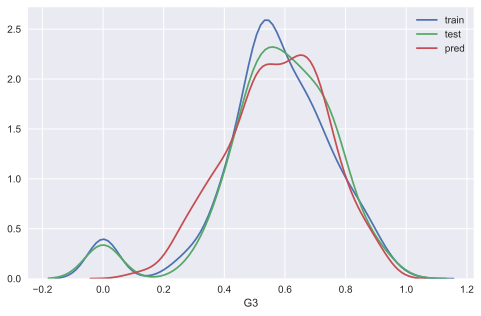

In [65]:
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(predictedDependentVariables, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

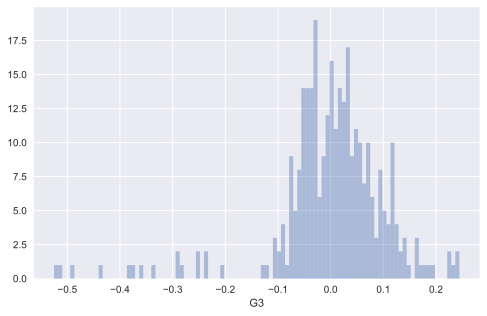

In [66]:
error = testDependentVariables - predictedDependentVariables
sns.distplot(error, bins=100, kde=False)
plt.show()

Ошибки также возникают вблизи нуля.

##### CV ГРЕБНЕВОЙ РЕГРЕССИИ

In [67]:
ridgeModel = linear_model.RidgeCV(alphas=np.arange(0, 100, 0.1), 
                                  cv=5,
                                  scoring='neg_mean_squared_error')

In [68]:
%%time

ridgeModel.fit(trainData, trainDependentVariables)

Wall time: 37.9 s


RidgeCV(alphas=array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8...
       94.6, 94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6,
       95.7, 95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7,
       96.8, 96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8,
       97.9, 98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9,
       99. , 99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize

In [69]:
ridgeModel.alpha_

17.6

In [70]:
predictedDependentVariables = ridgeModel.predict(testData)

In [71]:
calc_metrics(testDependentVariables, predictedDependentVariables)

MSE:   0.011373755238975363
RMSE:  0.10664780934916274
R2:    0.685227987553468
MAE:   0.06978139346656899
MedAE: 0.04694885609893104


In [72]:
coefs = pd.Series(ridgeModel.coef_, 
                  index=trainData.columns)

x = abs(coefs).sort_values(ascending=False)
coefs[x.index]

G1                    0.147810
Por Subject           0.027272
failures             -0.015459
absences              0.009612
U address             0.008828
yes schoolsup         0.006216
yes paid              0.005452
yes cheating         -0.004862
reason__home         -0.003922
studytime            -0.003564
goout                -0.003380
T Pstatus            -0.003331
yes internet          0.003331
reason__reputation    0.003137
age                   0.002700
famrel                0.002600
M sex                -0.002563
yes higher            0.002205
MS school             0.001679
reason__course        0.001559
alcohol              -0.001452
reason__other        -0.001291
yes activities       -0.001093
Medu                  0.001010
yes famsup            0.000919
guardian__father     -0.000893
Fedu                 -0.000624
guardian__mother      0.000602
guardian__other       0.000421
dtype: float64

Довольно логичные веса: failures, yes cheating, reason__home, goout, alcohol, reason__other, yes activities отрицательно влияют на оценку ученика. Есть некоторые нелогичные веса, например для studytime.

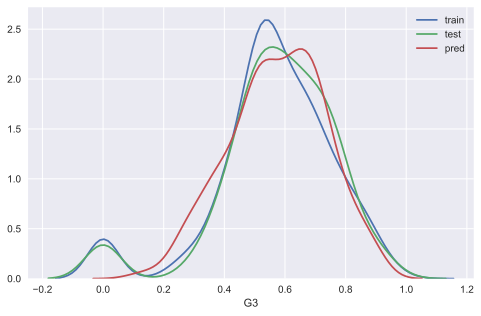

In [73]:
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(predictedDependentVariables, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

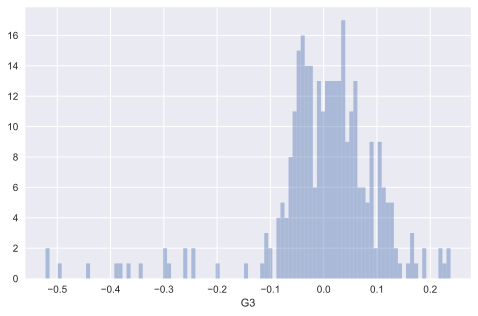

In [74]:
error = testDependentVariables - predictedDependentVariables
sns.distplot(error, bins=100, kde=False)
plt.show()

#### ЛАССО

In [75]:
lassoModel = linear_model.Lasso(alpha=0)

lassoModel.fit(trainData, trainDependentVariables)

c:\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
c:\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.3542783664198295, tolerance: 0.0027564934931506853
  positive)


Lasso(alpha=0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [76]:
predictedDependentVariables = lassoModel.predict(testData)

In [77]:
calc_metrics(testDependentVariables, predictedDependentVariables)

MSE:   0.01141773706531122
RMSE:  0.10685381165551007
R2:    0.6840107776086496
MAE:   0.07043068964943613
MedAE: 0.048388506353005345


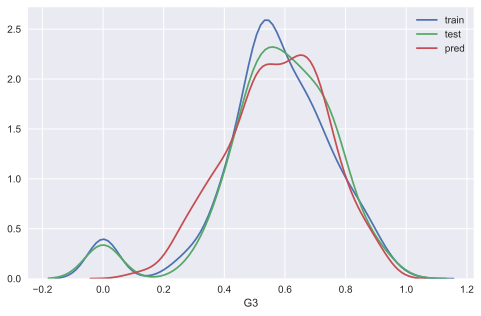

In [78]:
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(predictedDependentVariables, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

### CV LASSO

In [79]:
lassoModel = linear_model.LassoCV(alphas=np.arange(0, 100, 10), 
                                  cv=5)

In [80]:
%%time

lassoModel.fit(trainData, trainDependentVariables)

c:\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
c:\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2630146393109527, tolerance: 0.0022541399828767124
  tol, rng, random, positive)
c:\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
c:\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.532545347763971, tolerance: 0.0021982037671232878
  tol, rng, random, positive)
c:\python36\lib\site-packages\sklearn\l

Wall time: 206 ms


LassoCV(alphas=array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]), copy_X=True,
        cv=5, eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
        n_jobs=None, normalize=False, positive=False, precompute='auto',
        random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [81]:
lassoModel.alpha_

0

In [82]:
predictedDependentVariables = lassoModel.predict(testData)

In [83]:
calc_metrics(testDependentVariables, predictedDependentVariables)

MSE:   0.01141773706531122
RMSE:  0.10685381165551007
R2:    0.6840107776086496
MAE:   0.07043068964943613
MedAE: 0.048388506353005345


In [84]:
coefs = pd.Series(lassoModel.coef_, 
                  index=trainData.columns)

x = abs(coefs).sort_values(ascending=False)
coefs[x.index]

G1                    0.152697
Por Subject           0.027830
failures             -0.014781
absences              0.010268
U address             0.009064
yes schoolsup         0.007407
yes paid              0.006283
yes cheating         -0.004937
studytime            -0.004225
reason__home         -0.004097
T Pstatus            -0.003494
goout                -0.003224
yes internet          0.003182
reason__reputation    0.003172
age                   0.003057
famrel                0.002677
MS school             0.002540
M sex                -0.002449
reason__course        0.001795
guardian__father     -0.001620
yes higher            0.001528
reason__other        -0.001375
yes activities       -0.001264
yes famsup            0.001218
alcohol              -0.001135
Fedu                 -0.000878
Medu                  0.000498
guardian__other      -0.000137
guardian__mother      0.000095
dtype: float64

Большинство весов логичные, кроме (как в гребневой регрессии было) studytime, Fedu, guardian__other.

In [85]:
%%time

coefs = []
for alpha in range(0, 100, 10):
    lassoModel = linear_model.Lasso(alpha=alpha).fit(trainData, trainDependentVariables)
    coefs.append(abs(lassoModel.coef_))

coefs = pd.DataFrame(coefs, columns=trainData.columns)

c:\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
c:\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.3542783664198295, tolerance: 0.0027564934931506853
  positive)


Wall time: 99.8 ms


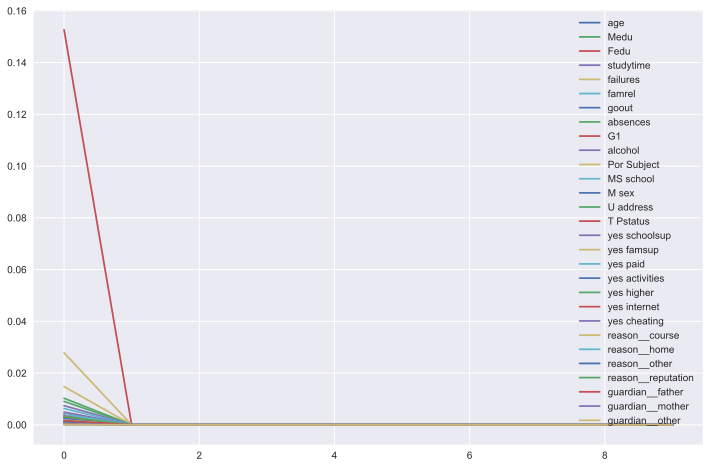

In [86]:
coefs.plot(figsize=(12, 8))
plt.show()

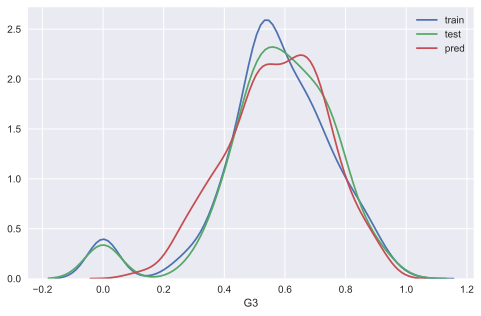

In [87]:
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(predictedDependentVariables, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

### ElasticNet

In [88]:
ElasticNetModel = linear_model.ElasticNet(alpha=0)

ElasticNetModel.fit(trainData, trainDependentVariables)

c:\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
c:\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.3542783664198295, tolerance: 0.0027564934931506853
  positive)


ElasticNet(alpha=0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [89]:
predictedDependentVariables = ElasticNetModel.predict(testData)

In [90]:
calc_metrics(testDependentVariables, predictedDependentVariables)

MSE:   0.01141773706531122
RMSE:  0.10685381165551007
R2:    0.6840107776086496
MAE:   0.07043068964943613
MedAE: 0.048388506353005345


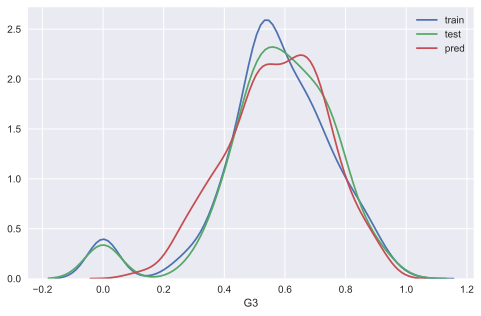

In [91]:
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(predictedDependentVariables, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

### CV ElasticNetModel

In [92]:
ElasticNetModel = linear_model.ElasticNetCV(alphas=np.arange(0, 100, 10), 
                                  cv=5)

In [93]:
%%time

ElasticNetModel.fit(trainData, trainDependentVariables)

Wall time: 118 ms


c:\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
c:\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2630146393109527, tolerance: 0.0022541399828767124
  tol, rng, random, positive)
c:\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
c:\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.532545347763971, tolerance: 0.0021982037671232878
  tol, rng, random, positive)
c:\python36\lib\site-packages\sklearn\l

ElasticNetCV(alphas=array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]),
             copy_X=True, cv=5, eps=0.001, fit_intercept=True, l1_ratio=0.5,
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [94]:
ElasticNetModel.alpha_

0

In [95]:
predictedDependentVariables = ElasticNetModel.predict(testData)

In [96]:
calc_metrics(testDependentVariables, predictedDependentVariables)

MSE:   0.01141773706531122
RMSE:  0.10685381165551007
R2:    0.6840107776086496
MAE:   0.07043068964943613
MedAE: 0.048388506353005345


In [97]:
coefs = pd.Series(ElasticNetModel.coef_, 
                  index=trainData.columns)

x = abs(coefs).sort_values(ascending=False)
coefs[x.index]

G1                    0.152697
Por Subject           0.027830
failures             -0.014781
absences              0.010268
U address             0.009064
yes schoolsup         0.007407
yes paid              0.006283
yes cheating         -0.004937
studytime            -0.004225
reason__home         -0.004097
T Pstatus            -0.003494
goout                -0.003224
yes internet          0.003182
reason__reputation    0.003172
age                   0.003057
famrel                0.002677
MS school             0.002540
M sex                -0.002449
reason__course        0.001795
guardian__father     -0.001620
yes higher            0.001528
reason__other        -0.001375
yes activities       -0.001264
yes famsup            0.001218
alcohol              -0.001135
Fedu                 -0.000878
Medu                  0.000498
guardian__other      -0.000137
guardian__mother      0.000095
dtype: float64

Снова довольно логичные веса схожие с весами в предыдущих моделях. 

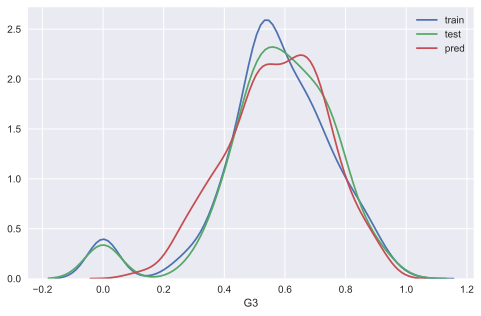

In [98]:
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(predictedDependentVariables, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

#### ПОЛИНОМИАЛЬНАЯ РЕГРЕССИЯ

In [99]:
from sklearn.preprocessing import PolynomialFeatures

In [100]:
poly = PolynomialFeatures(degree=2)
poly.fit(trainData)

poly_train = poly.transform(trainData)
poly_test = poly.transform(testData)

print('Original number of features:', trainData.shape[1])
print('Number of features after polynomial transformation:', poly_train.shape[1])

Original number of features: 29
Number of features after polynomial transformation: 465


In [101]:
%%time

regressionModel = linear_model.Ridge(alpha=0)
regressionModel.fit(poly_train, trainDependentVariables)

Wall time: 338 ms


Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [102]:
predictedDependentVariables = regressionModel.predict(poly_test)

In [103]:
print('Train:')
calc_metrics(trainDependentVariables, regressionModel.predict(poly_train))

print('\nTest:')
calc_metrics(testDependentVariables, regressionModel.predict(poly_test))

Train:
MSE:   0.008488776220034248
RMSE:  0.09213455497279101
R2:    0.7751924081800745
MAE:   0.07188784246575343
MedAE: 0.059374999999999956

Test:
MSE:   0.03497200935509555
RMSE:  0.1870080462308923
R2:    0.032139382929601945
MAE:   0.13081210191082804
MedAE: 0.09062499999999996


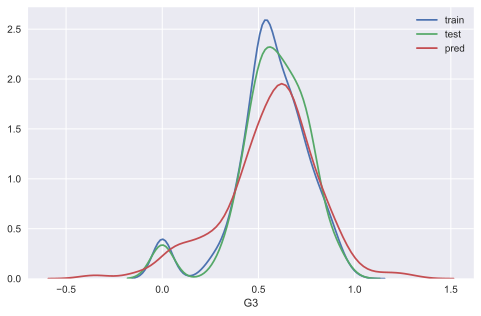

In [104]:
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(predictedDependentVariables, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

Модель недостаточно хороша. Поробуем изменить alpha.

In [105]:
%%time

regressionModel = linear_model.Ridge(alpha=100)
regressionModel.fit(poly_train, trainDependentVariables)

Wall time: 40.1 ms


Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [106]:
predictedDependentVariables = regressionModel.predict(poly_test)

In [107]:
print('Train:')
calc_metrics(trainDependentVariables, regressionModel.predict(poly_train))

print('\nTest:')
calc_metrics(testDependentVariables, regressionModel.predict(poly_test))

Train:
MSE:   0.005777110294700376
RMSE:  0.0760073042193997
R2:    0.8470052432334643
MAE:   0.05613838889644106
MedAE: 0.04383630888855228

Test:
MSE:   0.014693891099462014
RMSE:  0.12121836123072285
R2:    0.5933422537353179
MAE:   0.0846495939824857
MedAE: 0.06275999795471945


Ошибок стало меньше после регуляризации.

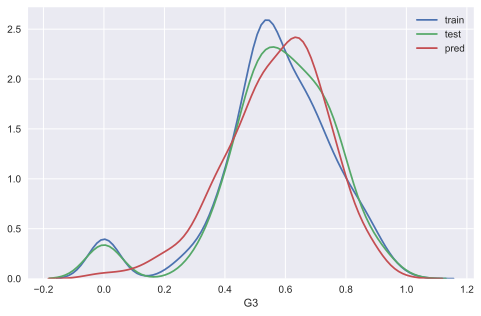

In [108]:
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(predictedDependentVariables, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

### 3Я СТЕПЕНЬ ПОЛИНОМА

In [109]:
poly = PolynomialFeatures(degree=3)
poly.fit(trainData)

poly_train = poly.transform(trainData)
poly_test = poly.transform(testData)

print('Original number of features:', trainData.shape[1])
print('Number of features after polynomial transformation:', poly_train.shape[1])

Original number of features: 29
Number of features after polynomial transformation: 4960


In [110]:
%%time

regressionModel = linear_model.Ridge(alpha=0)
regressionModel.fit(poly_train, trainDependentVariables)

Wall time: 194 ms


c:\python36\lib\site-packages\sklearn\linear_model\_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=4.21981e-19): result may not be accurate.
  overwrite_a=False)


Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [111]:
predictedDependentVariables = regressionModel.predict(poly_test)

In [112]:
print('Train:')
calc_metrics(trainDependentVariables, regressionModel.predict(poly_train))

print('\nTest:')
calc_metrics(testDependentVariables, regressionModel.predict(poly_test))

Train:
MSE:   3.0944325346800377e-30
RMSE:  1.7590999217440827e-15
R2:    1.0
MAE:   6.9063856612341285e-16
MedAE: 4.440892098500626e-16

Test:
MSE:   0.02138738617027298
RMSE:  0.14624426884590377
R2:    0.40809781428051584
MAE:   0.10275891879483916
MedAE: 0.07557807236692138


In [113]:
error = abs(testDependentVariables - regressionModel.predict(poly_test))
np.quantile(error, np.arange(0, 1.01, 0.1))

array([2.18569233e-04, 1.20841290e-02, 2.62987267e-02, 3.94407085e-02,
       5.76622900e-02, 7.55780724e-02, 9.25288065e-02, 1.22058283e-01,
       1.57647647e-01, 2.33650703e-01, 8.05471144e-01])

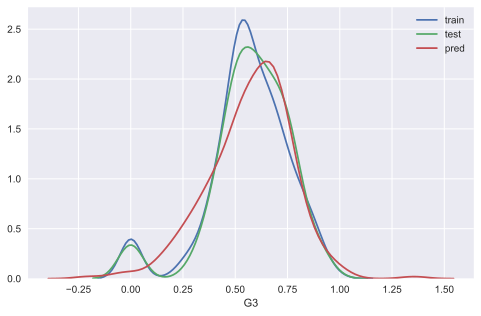

In [114]:
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(predictedDependentVariables, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

Попробуем изменить значение alpha.

In [115]:
%%time

regressionModel = linear_model.Ridge(alpha=100)
regressionModel.fit(poly_train, trainDependentVariables)

Wall time: 152 ms


Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [116]:
predictedDependentVariables = regressionModel.predict(poly_test)

In [117]:
print('Train:')
calc_metrics(trainDependentVariables, regressionModel.predict(poly_train))

print('\nTest:')
calc_metrics(testDependentVariables, regressionModel.predict(poly_test))

Train:
MSE:   0.00014519475462203022
RMSE:  0.012049678610736065
R2:    0.9961548187529754
MAE:   0.007439450694959374
MedAE: 0.0038205536686586328

Test:
MSE:   0.016432877568568743
RMSE:  0.1281907858177363
R2:    0.5452152931144099
MAE:   0.0910191991366664
MedAE: 0.0676886841759077


Неожиданно линейная модель оказалась лучше полиномиальной.

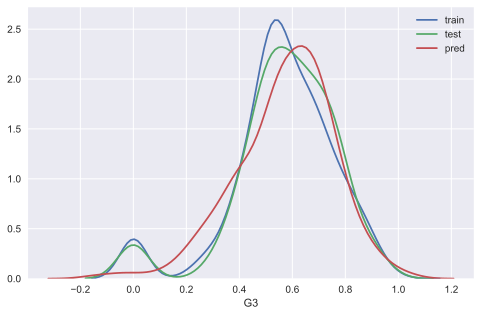

In [118]:
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(predictedDependentVariables, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

#### KNN

In [119]:
from sklearn.preprocessing import MinMaxScaler

In [120]:
house_scaler = MinMaxScaler()
house_scaler.fit(data.iloc[:,1:])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [121]:
data.iloc[:,1:] = house_scaler.transform(data.iloc[:,1:])

In [122]:
data.min(axis=0).round(3)

age                   0.0
Medu                  0.0
Fedu                  0.0
studytime             0.0
failures              0.0
famrel                0.0
goout                 0.0
absences              0.0
G1                    0.0
G3                    0.0
alcohol               0.0
Por Subject           0.0
MS school             0.0
M sex                 0.0
U address             0.0
T Pstatus             0.0
yes schoolsup         0.0
yes famsup            0.0
yes paid              0.0
yes activities        0.0
yes higher            0.0
yes internet          0.0
yes cheating          0.0
reason__course        0.0
reason__home          0.0
reason__other         0.0
reason__reputation    0.0
guardian__father      0.0
guardian__mother      0.0
guardian__other       0.0
dtype: float64

In [123]:
data.max(axis=0).round(3)

age                   1.0
Medu                  1.0
Fedu                  1.0
studytime             1.0
failures              1.0
famrel                1.0
goout                 1.0
absences              1.0
G1                    1.0
G3                    1.0
alcohol               1.0
Por Subject           1.0
MS school             1.0
M sex                 1.0
U address             1.0
T Pstatus             1.0
yes schoolsup         1.0
yes famsup            1.0
yes paid              1.0
yes activities        1.0
yes higher            1.0
yes internet          1.0
yes cheating          1.0
reason__course        1.0
reason__home          1.0
reason__other         1.0
reason__reputation    1.0
guardian__father      1.0
guardian__mother      1.0
guardian__other       1.0
dtype: float64

In [124]:
(trainData, 
 testData, 
 trainDependentVariables, 
 testDependentVariables) = train_test_split(data.drop('G3', axis=1),
                                            data['G3'],
                                            test_size=0.3, 
                                            random_state=5)

In [125]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

Подберем число соседей

In [126]:
kMeans = list()

for k in range(1, 51):
    knr = KNeighborsRegressor(n_neighbors=k)
    knr.fit(trainData, trainDependentVariables)
    score = cross_val_score(knr, trainData, trainDependentVariables, cv=5)
    m = score.mean()
    kMeans.append(m)
    
m = max(kMeans)
indices = [i for i, j in enumerate(kMeans) if j == m]
 
print(indices[0]+1)

12


In [127]:
knrModel = KNeighborsRegressor(n_neighbors=indices[0]+1)

knrModel.fit(trainData, trainDependentVariables)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                    weights='uniform')

In [128]:
%%time
predictedDependentVariables = knrModel.predict(testData)

Wall time: 29.9 ms


In [129]:
calc_metrics(testDependentVariables, predictedDependentVariables)

MSE:   0.027046399504600145
RMSE:  0.1644578958414589
R2:    0.2514829603223614
MAE:   0.11600318471337578
MedAE: 0.08333333333333337


Подбор k на кросс-валидации

In [130]:
from sklearn.model_selection import KFold

In [131]:
kf = KFold(n_splits=5, shuffle=True)
kf.get_n_splits(trainData)

5

In [132]:
for train_index, test_index in kf.split(trainData):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [  1   2   3   4   6   7   8   9  10  12  13  14  15  16  17  18  19  22
  23  24  26  28  29  30  32  33  34  35  38  39  40  41  42  44  45  46
  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  66  67  68  69  71  72  73  74  76  77  78  79  80  81  82  83  84  85
  86  88  90  91  92  93  95  96  97  98  99 100 101 102 103 104 105 106
 109 111 112 113 114 115 116 117 118 120 121 122 123 125 127 128 130 131
 132 133 134 136 137 138 139 140 141 142 143 144 145 147 148 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 179 180 181 182 183 184 185 186 187 189 190
 191 192 194 195 196 197 198 199 200 203 204 205 207 209 210 211 215 216
 217 218 219 221 223 224 225 226 227 228 229 230 231 232 233 235 236 237
 238 239 242 243 244 245 246 247 248 249 250 251 252 254 255 257 258 260
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 280 281 282
 283 284 285 286 287 288 289 290 293 294 295

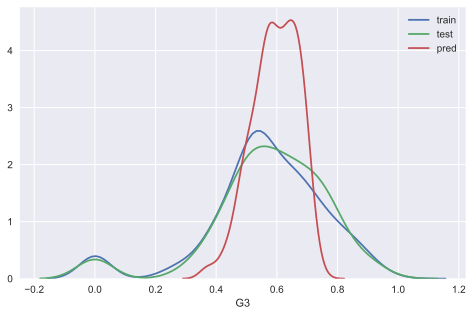

In [133]:
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(predictedDependentVariables, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

Модель определила для большинства учеников среднюю оценку, что может быть и неплохо, но не для наших данных.

### Radius Neighbors

In [134]:
from sklearn.neighbors import RadiusNeighborsRegressor

In [135]:
from scipy.spatial.distance import pdist

In [136]:
dist = pdist(data, 'euclidean')    

In [137]:
max_rad = round(np.max(dist), 1)
min_rad = round(np.min(dist), 1)
print(max_rad, min_rad)


i = 0
radiuses = list()
while min_rad + 0.1*i <= max_rad:
    radiuses.append(min_rad + 0.1*i)
    i += 1
    

4.4 0.1


In [138]:
total = dict()
splits = [(i, j) for (i,j) in kf.split(trainData)]
trainData = np.array(trainData)
trainDependentVariables = np.array(trainDependentVariables)

 


for rad in radiuses:
    for train_index, test_index in splits:
        rnr = RadiusNeighborsRegressor(radius = rad)
        rnr.fit(trainData[train_index], trainDependentVariables[train_index])
        mean_mark = np.mean(trainDependentVariables[train_index])
        error = []
        predictedDependentVariables = rnr.predict(trainData[test_index])
        pred = np.nan_to_num(predictedDependentVariables, nan=mean_mark) 
        error.append(metrics.mean_absolute_error(y_pred=pred, y_true=trainDependentVariables[test_index]))
    total[rad] = sum(error)/len(error)

 

min = 1000000000
req_rad = 0
for rad in radiuses:
    if total[rad] < min:
        min = total[rad]
        req_rad = rad
 
print('Лучший радиус: ', req_rad)

c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-pack

c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-pack

c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-pack

Лучший радиус:  1.2000000000000002


In [139]:
rnrModel = RadiusNeighborsRegressor(radius=req_rad)

rnrModel.fit(trainData, trainDependentVariables)

RadiusNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                         metric_params=None, n_jobs=None, p=2,
                         radius=1.2000000000000002, weights='uniform')

In [140]:
%%time

predictedDependentVariables = rnrModel.predict(testData)
len(predictedDependentVariables)

Wall time: 42.9 ms


c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


314

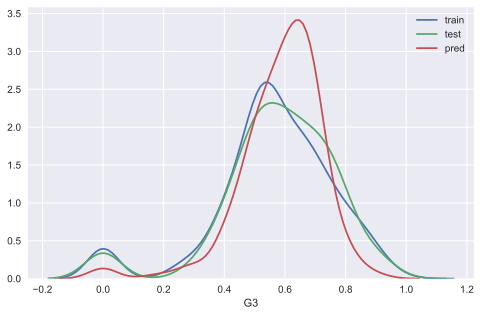

In [141]:
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(predictedDependentVariables, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

In [142]:
is_nan = np.isnan(predictedDependentVariables)
sum(~is_nan)

187

In [143]:
mean_mark = np.mean(trainDependentVariables)

In [144]:
pred = np.nan_to_num(predictedDependentVariables, nan=mean_mark)

In [145]:
calc_metrics(testDependentVariables, pred)

MSE:   0.03368197628507292
RMSE:  0.18352650022564293
R2:    0.067841426541557
MAE:   0.13276395641896035
MedAE: 0.09999999999999998


In [146]:
#pip install graphviz

## Decision Trees

In [147]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import graphviz
from sklearn.tree import export_graphviz

In [148]:
dtree_model = DecisionTreeRegressor(max_depth=7)
dtree_model.fit(trainData, trainDependentVariables)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [149]:
predictedDependentVariables = dtree_model.predict(testData)

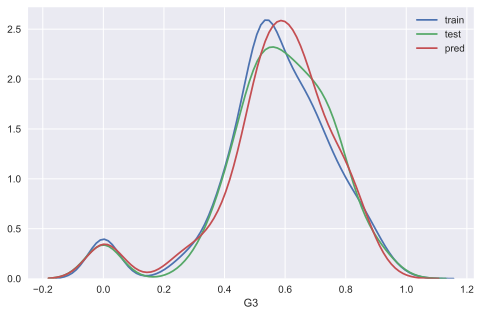

In [150]:
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(predictedDependentVariables, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

In [151]:
print('\nTest:')
calc_metrics(testDependentVariables, predictedDependentVariables)


Test:
MSE:   0.010890866087998004
RMSE:  0.10435931241627651
R2:    0.6985920864502748
MAE:   0.0656303916428739
MedAE: 0.0499999999999996


In [152]:
import graphviz
from sklearn.tree import export_graphviz

In [309]:
#dot_data = export_graphviz(dtree_model, 
#                           out_file=None, 
#                           feature_names=trainData.columns, 
#                           class_names=['0', '1'],
#                           filled=True, 
#                           rounded=True, 
#                           special_characters=True)
#
#graph = graphviz.Source(dot_data) 
#graph.render("dtree_model_2")

Мы не ошиблись с глубиной, и дерево предсказало неплохую модель определения оценок с небольшим сдвигом около нуля.

Итог для датасета с признаком G1.
K Nearest Neighbors и Radius Neighbors оказались плохими моделями для предсказания итоговой оценки. Учитывая, лишь оценку R^2 можно и все оставшиеся модели отнести к среднему качеству. Кросс-валидация, как показала практика, очень необходима, переобучение встречалось часто. И именно с кросс-валидацией такие модели как у Лассо и Elastic Net оказались очень хорошими.
Довольно ожидаемо ухудшение качества моделей без признака G1.

### Теперь без G1

In [154]:
data_no_G1 = data.drop('G1', axis=1)
data_no_G1.head()

,age,Medu,Fedu,studytime,failures,famrel,goout,absences,G3,alcohol,Por Subject,MS school,M sex,U address,T Pstatus,yes schoolsup,yes famsup,yes paid,yes activities,yes higher,yes internet,yes cheating,reason__course,reason__home,reason__other,reason__reputation,guardian__father,guardian__mother,guardian__other
0,0.142857,0.75,1.00,0.000000,0.000000,0.50,0.00,0.160000,0.70,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.285714,0.75,0.50,0.333333,0.000000,1.00,0.75,0.026667,0.85,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.142857,0.25,0.50,0.000000,0.666667,0.75,1.00,0.000000,0.50,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.285714,0.50,0.75,0.333333,0.000000,0.75,0.50,0.053333,0.80,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.142857,0.25,0.25,0.000000,0.000000,0.75,0.25,0.026667,0.65,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [155]:
(trainData, 
 testData, 
 trainDependentVariables, 
 testDependentVariables) = train_test_split(data_no_G1.drop('G3', axis=1),
                                            data_no_G1['G3'],
                                            test_size=0.3, 
                                            random_state=5)

In [156]:
trainData.shape

(730, 28)

In [157]:
testData.shape

(314, 28)

In [158]:
trainDependentVariables.shape

(730,)

In [159]:
testDependentVariables.shape

(314,)

### Линейная регрессия

In [160]:
%%time

regressionModel = linear_model.LinearRegression()
regressionModel.fit(trainData, trainDependentVariables)

Wall time: 5.79 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [161]:
predictedDependentVariables = regressionModel.predict(testData)

In [162]:
predictedDependentVariables

array([0.52001953, 0.56665039, 0.6262207 , 0.38122559, 0.59362793,
       0.51342773, 0.66821289, 0.6529541 , 0.69812012, 0.70788574,
       0.51074219, 0.5760498 , 0.70837402, 0.5065918 , 0.38671875,
       0.68310547, 0.5579834 , 0.67297363, 0.53295898, 0.60583496,
       0.65368652, 0.55310059, 0.45996094, 0.67333984, 0.63879395,
       0.68127441, 0.6607666 , 0.51049805, 0.70031738, 0.57775879,
       0.68969727, 0.58496094, 0.32373047, 0.33410645, 0.52819824,
       0.46179199, 0.59008789, 0.28417969, 0.23742676, 0.33459473,
       0.2722168 , 0.66247559, 0.43322754, 0.62670898, 0.59313965,
       0.63757324, 0.50402832, 0.41040039, 0.56298828, 0.48156738,
       0.48034668, 0.63049316, 0.74963379, 0.69592285, 0.4732666 ,
       0.56652832, 0.59692383, 0.67248535, 0.4387207 , 0.71325684,
       0.578125  , 0.64978027, 0.65441895, 0.63366699, 0.59997559,
       0.5090332 , 0.56542969, 0.55627441, 0.57348633, 0.50524902,
       0.52307129, 0.61071777, 0.61633301, 0.61206055, 0.70349

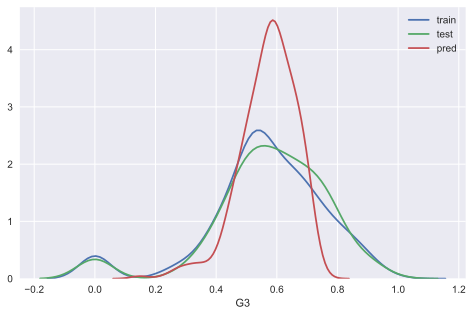

In [163]:
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(predictedDependentVariables, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

Как и ожидалось, модель без признака G1 предсказывает итоговую оценку хуже.

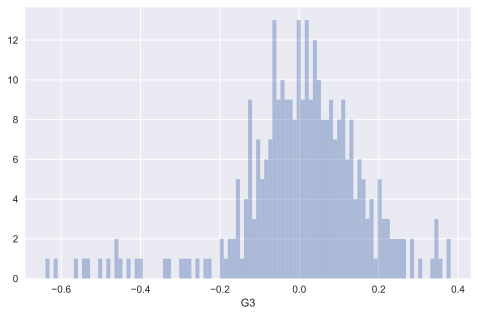

In [164]:
error = testDependentVariables - predictedDependentVariables
sns.distplot(error, bins=100, kde=False)
plt.show()

In [165]:
calc_metrics(testDependentVariables, predictedDependentVariables)

MSE:   0.02630563204455528
RMSE:  0.1621901108099852
R2:    0.27198391706479197
MAE:   0.11574598178742038
MedAE: 0.08206787109375002


In [166]:
calc_metrics(trainDependentVariables, regressionModel.predict(trainData))

MSE:   0.028464093058893126
RMSE:  0.16871304946237303
R2:    0.24618766615546306
MAE:   0.1211212074593322
MedAE: 0.08891601562500001


In [167]:
coefs = pd.Series(regressionModel.coef_, 
                  index=trainData.columns)

x = abs(coefs).sort_values(ascending=False)
coefs[x.index]

guardian__mother     -8.069353e+11
guardian__father     -8.069353e+11
guardian__other      -8.069353e+11
reason__reputation    1.083996e+11
reason__other         1.083996e+11
reason__home          1.083996e+11
reason__course        1.083996e+11
failures             -2.158895e-01
yes higher            8.864692e-02
Por Subject           8.562312e-02
yes schoolsup        -6.582260e-02
Medu                  5.782526e-02
MS school            -5.006200e-02
goout                -4.128369e-02
studytime             3.799828e-02
alcohol              -3.311387e-02
U address             2.622811e-02
yes internet          2.121903e-02
Fedu                  1.985812e-02
yes famsup           -1.805935e-02
yes cheating         -1.667030e-02
absences              1.385190e-02
famrel                1.093103e-02
yes activities        8.113825e-03
M sex                -7.156823e-03
age                  -4.809945e-03
T Pstatus             4.542035e-03
yes paid             -2.025676e-03
dtype: float64

Модель явно переобучилась. Сделаем регуляризацию.

### Регуляризация

In [168]:
house_scaler = StandardScaler()
trainData = pd.DataFrame(house_scaler.fit_transform(trainData), columns=trainData.columns)
testData = pd.DataFrame(house_scaler.transform(testData), columns=testData.columns)

### Гребневая регрессия

In [169]:
ridgeModel = linear_model.Ridge(alpha=0)

ridgeModel.fit(trainData, trainDependentVariables)

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [170]:
predictedDependentVariables = ridgeModel.predict(testData)

In [171]:
calc_metrics(testDependentVariables, predictedDependentVariables)

MSE:   0.02629822222570537
RMSE:  0.16216726619668154
R2:    0.2721889859749491
MAE:   0.1157468494572949
MedAE: 0.08191405293597503


In [172]:
coefs = pd.Series(ridgeModel.coef_, 
                  index=trainData.columns)

x = abs(coefs).sort_values(ascending=False)
coefs[x.index]

failures             -0.049360
Por Subject           0.041592
yes higher            0.025108
MS school            -0.022015
yes schoolsup        -0.021287
Medu                  0.016114
reason__course       -0.014144
alcohol              -0.013526
goout                -0.012078
U address             0.011706
reason__home         -0.011540
studytime             0.010515
guardian__other       0.009663
yes famsup           -0.008703
yes internet          0.008622
guardian__father      0.007294
reason__other        -0.006496
yes cheating         -0.006352
Fedu                  0.005444
yes activities        0.004049
M sex                -0.003508
reason__reputation   -0.003002
famrel                0.002563
T Pstatus             0.001425
absences              0.001166
age                  -0.000985
yes paid             -0.000813
guardian__mother      0.000137
dtype: float64

Коэффициенты достаточно логичны, как и в предшествующих моделях.

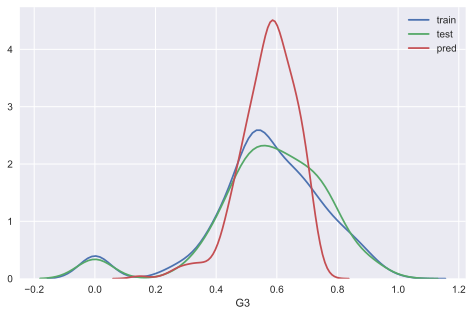

In [173]:
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(predictedDependentVariables, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

Модель просто предсказала для большинства учеников среднюю оценку.

In [174]:
ridgeModel = linear_model.RidgeCV(alphas=np.arange(0, 7, 0.1), 
                                  cv=5,
                                  scoring='neg_mean_squared_error')

In [175]:
%%time

ridgeModel.fit(trainData, trainDependentVariables)

Wall time: 2.28 s


RidgeCV(alphas=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [176]:
ridgeModel.alpha_

6.9

In [177]:
predictedDependentVariables = ridgeModel.predict(testData)
calc_metrics(testDependentVariables, predictedDependentVariables)

MSE:   0.02630555857086846
RMSE:  0.16218988430499745
R2:    0.27198595047062646
MAE:   0.11571076887477622
MedAE: 0.08190968358358697


In [178]:
coefs = pd.Series(ridgeModel.coef_, 
                  index=trainData.columns)

x = abs(coefs).sort_values(ascending=False)
coefs[x.index]

failures             -0.048927
Por Subject           0.041019
yes higher            0.024916
MS school            -0.021701
yes schoolsup        -0.021113
Medu                  0.016005
alcohol              -0.013407
goout                -0.011997
U address             0.011678
studytime             0.010546
yes internet          0.008626
yes famsup           -0.008574
guardian__other       0.006481
yes cheating         -0.006301
reason__reputation    0.006138
Fedu                  0.005543
guardian__mother     -0.005424
yes activities        0.004022
M sex                -0.003543
reason__course       -0.003337
famrel                0.002563
guardian__father      0.002074
reason__home         -0.001971
T Pstatus             0.001379
age                  -0.001117
absences              0.001099
yes paid             -0.001024
reason__other        -0.000183
dtype: float64

Коэффициенты вновь достаточно логичны, необходимые признаки уменьшают предсказываемую итоговую оценку.

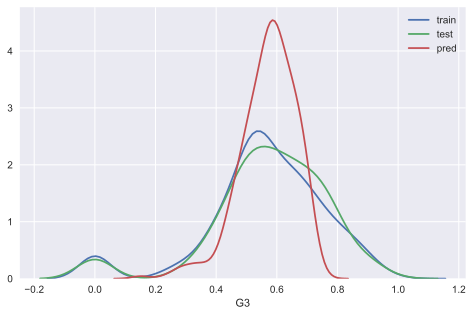

In [179]:
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(predictedDependentVariables, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

### ЛАССО

In [180]:
lassoModel = linear_model.Lasso(alpha=0)

lassoModel.fit(trainData, trainDependentVariables)

c:\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
c:\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.389397433448197, tolerance: 0.0027564934931506853
  positive)


Lasso(alpha=0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [181]:
predictedDependentVariables = lassoModel.predict(testData)

In [182]:
calc_metrics(testDependentVariables, predictedDependentVariables)

MSE:   0.026298222225705353
RMSE:  0.16216726619668148
R2:    0.27218898597494956
MAE:   0.11574684945729484
MedAE: 0.0819140529359752


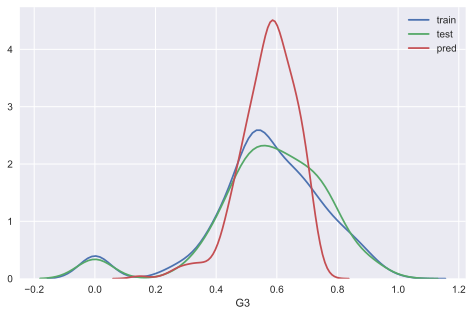

In [183]:
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(predictedDependentVariables, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

#### CV LASSO

In [184]:
lassoModel = linear_model.LassoCV(alphas=np.array(range(1, 100, 1))/1000, 
                                  cv=5)

In [185]:
%%time

lassoModel.fit(trainData, trainDependentVariables)

Wall time: 105 ms


LassoCV(alphas=array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.0...
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [186]:
lassoModel.alpha_

0.006

In [187]:
predictedDependentVariables = lassoModel.predict(testData)

In [188]:
calc_metrics(testDependentVariables, predictedDependentVariables)

MSE:   0.02620844418914829
RMSE:  0.16189022264839928
R2:    0.2746736194708178
MAE:   0.11589477451402448
MedAE: 0.08675462153738644


In [189]:
coefs = pd.Series(lassoModel.coef_, 
                  index=trainData.columns)

x = abs(coefs).sort_values(ascending=False)
coefs[x.index]

failures             -0.047854
Por Subject           0.032403
yes higher            0.020631
MS school            -0.017777
Medu                  0.015419
yes schoolsup        -0.014278
alcohol              -0.009671
U address             0.007717
studytime             0.007246
goout                -0.006916
reason__reputation    0.004997
yes internet          0.004550
guardian__mother     -0.003186
yes cheating         -0.000537
Fedu                  0.000000
famrel                0.000000
absences              0.000000
guardian__other       0.000000
T Pstatus             0.000000
M sex                -0.000000
yes famsup           -0.000000
yes paid             -0.000000
yes activities        0.000000
reason__course       -0.000000
reason__home         -0.000000
reason__other        -0.000000
guardian__father      0.000000
age                  -0.000000
dtype: float64

В данной модели мы попробовали изменить alphas, что явно разделило признаки на приоритетные и не приоритетные (занулил их), весы у признаков достаточно хорошее и логичное. 

In [190]:
%%time

coefs = []
for alpha in range(0, 100, 10):
    lassoModel = linear_model.Lasso(alpha=alpha).fit(trainData, trainDependentVariables)
    coefs.append(abs(lassoModel.coef_))

coefs = pd.DataFrame(coefs, columns=trainData.columns)

Wall time: 79.8 ms


c:\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
c:\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.389397433448197, tolerance: 0.0027564934931506853
  positive)


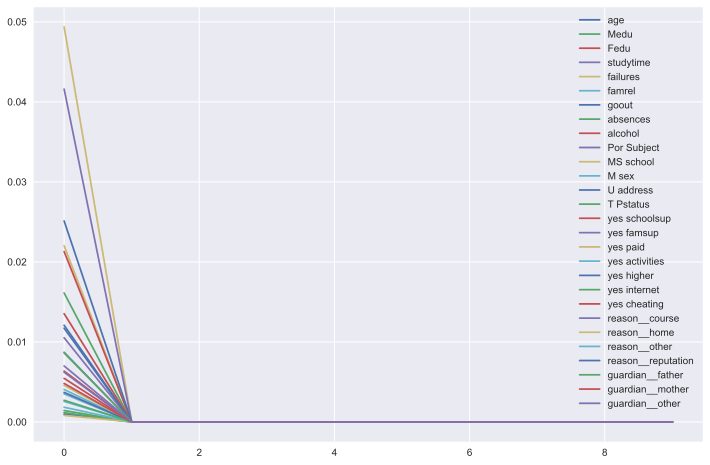

In [191]:
coefs.plot(figsize=(12, 8))
plt.show()

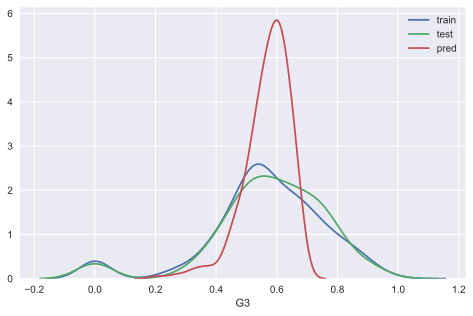

In [192]:
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(predictedDependentVariables, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

Многим ученикам модель предсказала среднюю оценку.

### ElasticNet

In [193]:
%%time

coefs = []
for alpha in range(1, 250, 100):
    ElasticNetModel = linear_model.ElasticNet(alpha=alpha).fit(trainData, trainDependentVariables)
    coefs.append(abs(ElasticNetModel.coef_))

coefs = pd.DataFrame(coefs, columns=trainData.columns)

Wall time: 18.9 ms


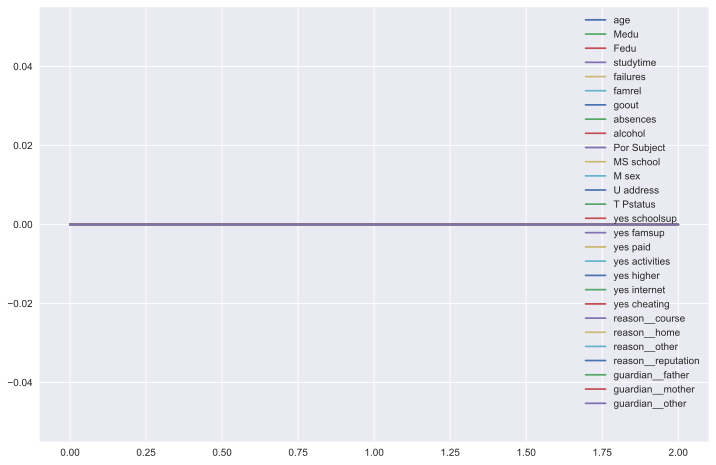

In [194]:
coefs.plot(figsize=(12, 8))
plt.show()

In [195]:
ElasticNetModel = linear_model.ElasticNet(alpha=0)

ElasticNetModel.fit(trainData, trainDependentVariables)

c:\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
c:\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.389397433448197, tolerance: 0.0027564934931506853
  positive)


ElasticNet(alpha=0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [196]:
predictedDependentVariables = ElasticNetModel.predict(testData)

In [197]:
calc_metrics(testDependentVariables, predictedDependentVariables)

MSE:   0.026298222225705353
RMSE:  0.16216726619668148
R2:    0.27218898597494956
MAE:   0.11574684945729484
MedAE: 0.0819140529359752


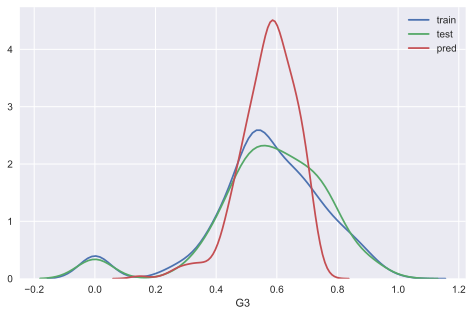

In [198]:
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(predictedDependentVariables, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

Модель предсказала большинству учеников среднюю оценку.

### ElasticNetCV

In [199]:
ElasticNetModel = linear_model.ElasticNetCV(alphas=np.arange(0, 100, 10), 
                                  cv=5)

In [200]:
%%time

ElasticNetModel.fit(trainData, trainDependentVariables)

Wall time: 109 ms


c:\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
c:\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.413009762536802, tolerance: 0.0022541399828767124
  tol, rng, random, positive)
c:\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
c:\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.260460156284518, tolerance: 0.0021982037671232878
  tol, rng, random, positive)
c:\python36\lib\site-packages\sklearn\li

ElasticNetCV(alphas=array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]),
             copy_X=True, cv=5, eps=0.001, fit_intercept=True, l1_ratio=0.5,
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [201]:
ElasticNetModel.alpha_

0

In [202]:
predictedDependentVariables = ElasticNetModel.predict(testData)

In [203]:
calc_metrics(testDependentVariables, predictedDependentVariables)

MSE:   0.026298222225705353
RMSE:  0.16216726619668148
R2:    0.27218898597494956
MAE:   0.11574684945729484
MedAE: 0.0819140529359752


In [204]:
coefs = pd.Series(ElasticNetModel.coef_, 
                  index=trainData.columns)

x = abs(coefs).sort_values(ascending=False)
coefs[x.index]

failures             -0.049360
Por Subject           0.041592
yes higher            0.025108
MS school            -0.022015
yes schoolsup        -0.021287
Medu                  0.016114
alcohol              -0.013526
goout                -0.012078
U address             0.011706
studytime             0.010515
yes famsup           -0.008703
yes internet          0.008622
guardian__other       0.006992
yes cheating         -0.006352
reason__course       -0.006206
Fedu                  0.005444
guardian__mother     -0.004809
reason__home         -0.004563
yes activities        0.004049
reason__reputation    0.003692
M sex                -0.003508
guardian__father      0.002703
famrel                0.002563
reason__other        -0.001835
T Pstatus             0.001425
absences              0.001166
age                  -0.000985
yes paid             -0.000813
dtype: float64

Вновь получаем  логичные весы у признаков, соотносящиеся по смыслу с ними.

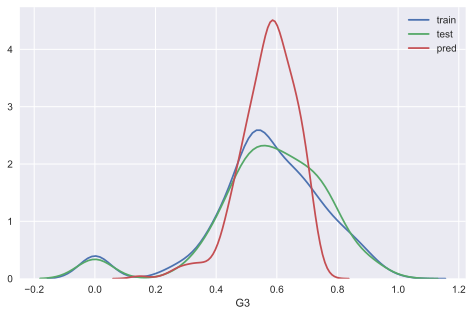

In [205]:
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(predictedDependentVariables, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

Модель предсказала большинству учеников среднюю оценку.

### ПОЛИНОМИАЛЬНАЯ РЕГРЕССИЯ

In [206]:
from sklearn.preprocessing import PolynomialFeatures

### Квадратичная регрессия

In [207]:
poly = PolynomialFeatures(degree=2)
poly.fit(trainData)

poly_train = poly.transform(trainData)
poly_test = poly.transform(testData)

print('Original number of features:', trainData.shape[1])
print('Number of features after polynomial transformation:', poly_train.shape[1])

Original number of features: 28
Number of features after polynomial transformation: 435


In [208]:
%%time

regressionModel = linear_model.Ridge(alpha=0)
regressionModel.fit(poly_train, trainDependentVariables)

Wall time: 219 ms


Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [209]:
predictedDependentVariables = regressionModel.predict(poly_test)

In [210]:
print('Train:')
calc_metrics(trainDependentVariables, regressionModel.predict(poly_train))

print('\nTest:')
calc_metrics(testDependentVariables, regressionModel.predict(poly_test))

Train:
MSE:   0.02473342519263699
RMSE:  0.15726864020724854
R2:    0.34498664932498746
MAE:   0.1212542808219178
MedAE: 0.09375

Test:
MSE:   0.10451181205214967
RMSE:  0.32328286693258224
R2:    -1.892395054480926
MAE:   0.23697253184713374
MedAE: 0.17343749999999997


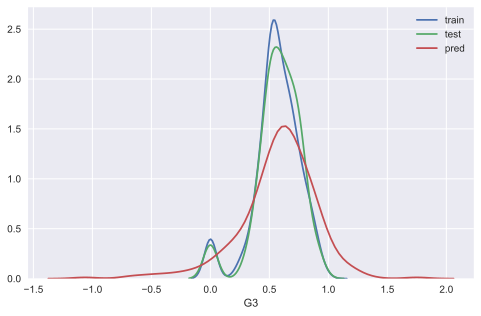

In [211]:
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(predictedDependentVariables, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

Поменяем alpha.

In [212]:
%%time

regressionModel = linear_model.Ridge(alpha=100)
regressionModel.fit(poly_train, trainDependentVariables)

Wall time: 23.1 ms


Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [213]:
predictedDependentVariables = regressionModel.predict(poly_test)

In [214]:
print('Train:')
calc_metrics(trainDependentVariables, regressionModel.predict(poly_train))

print('\nTest:')
calc_metrics(testDependentVariables, regressionModel.predict(poly_test))

Train:
MSE:   0.013990364311940194
RMSE:  0.11828087043956091
R2:    0.6294942842022503
MAE:   0.08925957326321082
MedAE: 0.06831809116127532

Test:
MSE:   0.02935540312976459
RMSE:  0.17133418552572802
R2:    0.18758060770721685
MAE:   0.1256591829210972
MedAE: 0.09603552241259522


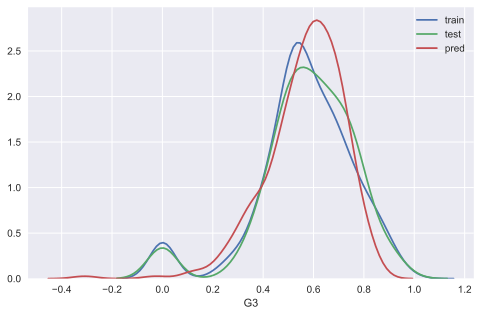

In [215]:
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(predictedDependentVariables, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

Модель определенно улучшилась.

#### 3Я СТЕПЕНЬ ПОЛИНОМА

In [216]:
poly = PolynomialFeatures(degree=3)
poly.fit(trainData)

poly_train = poly.transform(trainData)
poly_test = poly.transform(testData)

print('Original number of features:', trainData.shape[1])
print('Number of features after polynomial transformation:', poly_train.shape[1])

Original number of features: 28
Number of features after polynomial transformation: 4495


In [217]:
%%time

regressionModel = linear_model.Ridge(alpha=0)
regressionModel.fit(poly_train, trainDependentVariables)

c:\python36\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Wall time: 547 ms


Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [218]:
predictedDependentVariables = regressionModel.predict(poly_test)

In [219]:
print('Train:')
calc_metrics(trainDependentVariables, regressionModel.predict(poly_train))

print('\nTest:')
calc_metrics(testDependentVariables, regressionModel.predict(poly_test))

Train:
MSE:   6.164383561643837e-05
RMSE:  0.007851358838853207
R2:    0.9983674911581756
MAE:   0.00041095890412021376
MedAE: 7.771561172376096e-15

Test:
MSE:   0.04291113842010872
RMSE:  0.20715003842652002
R2:    -0.18757834269046159
MAE:   0.15975518073195846
MedAE: 0.12200698293855167


Явно видим переобучение.

In [220]:
error = abs(testDependentVariables - regressionModel.predict(poly_test))
np.quantile(error, np.arange(0, 1.01, 0.1))

array([4.25450581e-04, 3.27856768e-02, 5.88013552e-02, 7.63375379e-02,
       9.94448988e-02, 1.22006983e-01, 1.50129264e-01, 1.87285411e-01,
       2.47918664e-01, 3.29997967e-01, 7.85830986e-01])

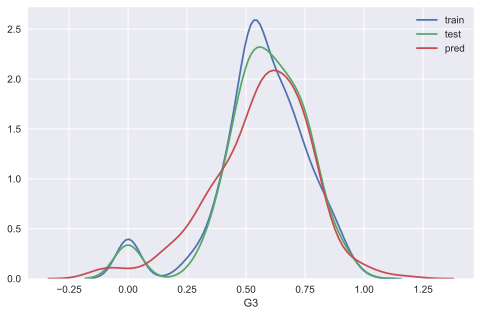

In [221]:
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(predictedDependentVariables, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

Изменим значение alpha.

In [222]:
%%time

regressionModel = linear_model.Ridge(alpha=100)
regressionModel.fit(poly_train, trainDependentVariables)

Wall time: 188 ms


Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [223]:
predictedDependentVariables = regressionModel.predict(poly_test)

In [224]:
print('Train:')
calc_metrics(trainDependentVariables, regressionModel.predict(poly_train))

print('\nTest:')
calc_metrics(testDependentVariables, regressionModel.predict(poly_test))

Train:
MSE:   0.0005248095743610498
RMSE:  0.022908722669783443
R2:    0.9861015093909883
MAE:   0.013938787043804668
MedAE: 0.007491485050774682

Test:
MSE:   0.035010206112473415
RMSE:  0.1871101443334204
R2:    0.031082276465101755
MAE:   0.13899896865079475
MedAE: 0.1043070192923588


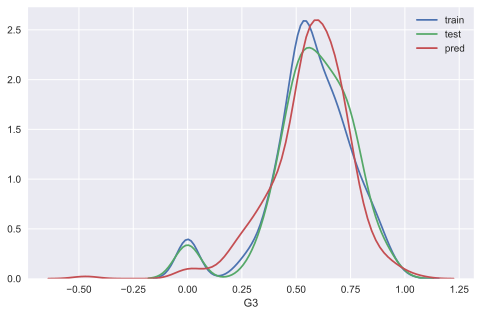

In [225]:
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(predictedDependentVariables, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

По ошибкам модель не особо лучше модели с полиномом второй степени.

### KNN

In [226]:
house_scaler = MinMaxScaler()
house_scaler.fit(data_no_G1.iloc[:,1:])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [227]:
data_no_G1.iloc[:,1:] = house_scaler.transform(data_no_G1.iloc[:,1:])

In [228]:
data_no_G1.min(axis=0).round(3)

age                   0.0
Medu                  0.0
Fedu                  0.0
studytime             0.0
failures              0.0
famrel                0.0
goout                 0.0
absences              0.0
G3                    0.0
alcohol               0.0
Por Subject           0.0
MS school             0.0
M sex                 0.0
U address             0.0
T Pstatus             0.0
yes schoolsup         0.0
yes famsup            0.0
yes paid              0.0
yes activities        0.0
yes higher            0.0
yes internet          0.0
yes cheating          0.0
reason__course        0.0
reason__home          0.0
reason__other         0.0
reason__reputation    0.0
guardian__father      0.0
guardian__mother      0.0
guardian__other       0.0
dtype: float64

In [229]:
data_no_G1.max(axis=0).round(3)

age                   1.0
Medu                  1.0
Fedu                  1.0
studytime             1.0
failures              1.0
famrel                1.0
goout                 1.0
absences              1.0
G3                    1.0
alcohol               1.0
Por Subject           1.0
MS school             1.0
M sex                 1.0
U address             1.0
T Pstatus             1.0
yes schoolsup         1.0
yes famsup            1.0
yes paid              1.0
yes activities        1.0
yes higher            1.0
yes internet          1.0
yes cheating          1.0
reason__course        1.0
reason__home          1.0
reason__other         1.0
reason__reputation    1.0
guardian__father      1.0
guardian__mother      1.0
guardian__other       1.0
dtype: float64

Вычислим оптимальное число соседей.

In [230]:
kMeans = list()

for k in range(1, 51):
    knr = KNeighborsRegressor(n_neighbors=k)
    knr.fit(trainData, trainDependentVariables)
    score = cross_val_score(knr, trainData, trainDependentVariables, cv=5)
    m = score.mean()
    kMeans.append(m)
    
m = max(kMeans)
indices = [i for i, j in enumerate(kMeans) if j == m]
 
print(indices[0]+1)

7


In [231]:
knrModel = KNeighborsRegressor(n_neighbors=indices[0]+1)

knrModel.fit(trainData, trainDependentVariables)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

In [232]:
%%time
predictedDependentVariables = knrModel.predict(testData)

Wall time: 29 ms


In [233]:
calc_metrics(testDependentVariables, predictedDependentVariables)

MSE:   0.029751559859612642
RMSE:  0.1724864048544483
R2:    0.17661685400595983
MAE:   0.12409008189262964
MedAE: 0.08928571428571425


In [234]:
kf = KFold(n_splits=5, shuffle=True)
kf.get_n_splits(trainData)

5

In [235]:
for train_index, test_index in kf.split(trainData):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [  0   1   2   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  26  27  28  29  30  31  33  34  36  39  40  41
  42  44  45  46  47  48  50  51  52  53  56  57  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  74  75  76  77  78  79  80  81  82  84
  86  87  88  89  90  92  93  94  95  96  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 114 115 117 118 119 120 121 124 125 126 127
 128 129 130 131 132 134 135 136 137 140 141 142 143 144 145 146 148 149
 150 151 152 153 154 159 160 162 163 165 166 169 171 172 173 174 175 176
 177 178 179 180 181 183 184 185 186 187 188 189 190 191 192 193 197 198
 199 200 201 202 203 204 206 207 208 209 210 213 214 215 216 221 222 224
 225 226 227 229 230 231 233 234 235 236 238 239 241 242 243 244 245 246
 247 248 249 251 253 254 255 256 258 259 260 262 263 264 265 266 269 270
 272 273 275 277 278 279 280 281 282 283 284 285 286 287 288 290 291 293
 294 295 297 298 299 301 302 303 304 305 306

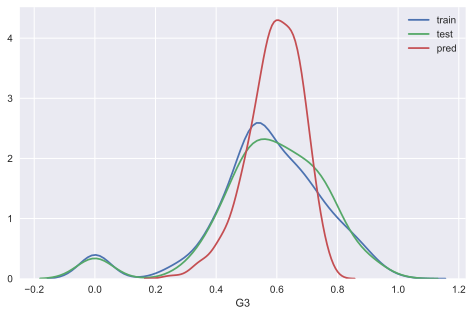

In [236]:
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(predictedDependentVariables, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

Большинству учеников модель предсказала среднюю оценку.

### Radius Neighbors

In [237]:
dist = pdist(data_no_G1, 'euclidean')    

In [238]:
max_rad = round(np.max(dist), 1)
min_rad = round(np.min(dist), 1)
print(max_rad, min_rad)


i = 0
radiuses = list()
while min_rad + 0.1*i <= max_rad:
    radiuses.append(min_rad + 0.1*i)
    i += 1
    

4.4 0.0


In [239]:
total = dict()
splits = [(i, j) for (i,j) in kf.split(trainData)]
trainData = np.array(trainData)
trainDependentVariables = np.array(trainDependentVariables)

 


for rad in radiuses:
    for train_index, test_index in splits:
        rnr = RadiusNeighborsRegressor(radius = rad)
        rnr.fit(trainData[train_index], trainDependentVariables[train_index])
        mean_mark = np.mean(trainDependentVariables[train_index])
        error = []
        predictedDependentVariables = rnr.predict(trainData[test_index])
        pred = np.nan_to_num(predictedDependentVariables, nan=mean_mark) 
        error.append(metrics.mean_absolute_error(y_pred=pred, y_true=trainDependentVariables[test_index]))
    total[rad] = sum(error)/len(error)

 

min = 1000000000
req_rad = 0
for rad in radiuses:
    if total[rad] < min:
        min = total[rad]
        req_rad = rad
 
print('Лучший радиус: ', req_rad)

c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-pack

c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-pack

c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-pack

c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-pack

c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-pack

Лучший радиус:  4.4


c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


In [240]:
rnrModel = RadiusNeighborsRegressor(radius=req_rad)

rnrModel.fit(trainData, trainDependentVariables)

RadiusNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                         metric_params=None, n_jobs=None, p=2, radius=4.4,
                         weights='uniform')

In [241]:
%%time

predictedDependentVariables = rnrModel.predict(testData)
len(predictedDependentVariables)

Wall time: 64.8 ms


c:\python36\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


314

In [242]:
is_nan = np.isnan(predictedDependentVariables)
sum(~is_nan)

275

In [243]:
mean_mark = np.mean(trainDependentVariables)

In [244]:
pred = np.nan_to_num(predictedDependentVariables, nan=mean_mark)

In [245]:
calc_metrics(testDependentVariables, pred)

MSE:   0.028929369205159088
RMSE:  0.17008635808070877
R2:    0.19937122153711762
MAE:   0.12444561276073444
MedAE: 0.09999999999999998


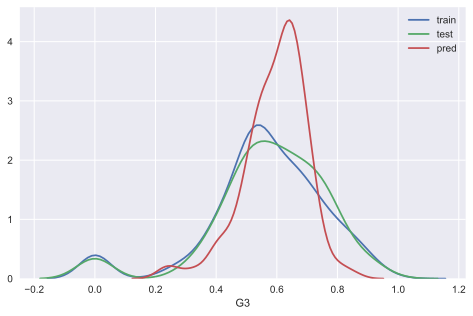

In [246]:
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(predictedDependentVariables, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

Модель не совсем хорошая, но лучше чем те модели, которые брали среднюю оценку.

### Decision Tree

In [247]:
dtree_model = DecisionTreeRegressor(max_depth=7) 
dtree_model.fit(trainData, trainDependentVariables)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [248]:
predictedDependentVariables = dtree_model.predict(testData)

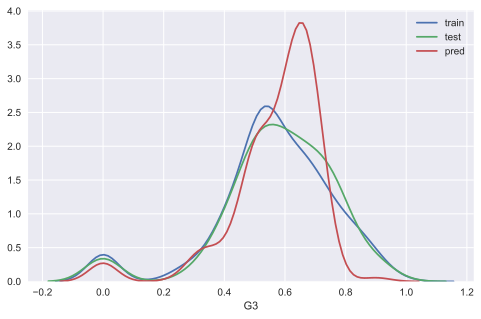

In [249]:
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(predictedDependentVariables, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

In [250]:
calc_metrics(testDependentVariables, predictedDependentVariables)

MSE:   0.03915668430365575
RMSE:  0.1978804798449199
R2:    -0.08367272374199786
MAE:   0.13971904913304511
MedAE: 0.10000000000000003


Мы видим, что оценка дерева достаточно плоха по среднеквадратичной оценке, качество модели уступает предыдущим экземплярам.

Итог для регрессии без G1.
Как и ожидалось, качество моделей ухудшилось без признака G1. Кросс-валидация также спасала модели линейной регрессии от переобучения. Рейтинг моделей остался прежним, как и для датасета с признаком G1. То есть лучшими моделями остаются Лассо, Elastic Net, а худшими KNN и Radius Neighbors.

### Бинарная классификация
  
* Решите задачу бинарной классификации: постройте модель, предсказывающую, сдаст студент предмет (`G3` >= 8) или не сдаст (`G3` < 8). <br>При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  

* При решении задачи рассмотрите различные модели:  
  * KNN и  Radius Neighbors;  
  * Логистическая регрессия;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  


* Оцените качество моделей, используйте различные подходы: confusion matrix и производные метрики, roc-кривая и roc auc. <br>Сделайте вывод о качестве решения задачи.  
  
  
* Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.
  * Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.
  * Сравните между собой деревья решений, полученные на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой. 


### Многоклассовая классификация
  
* Решите задачу многоклассовой классификации: постройте модель, пресдказывающую оценку студента по предмету по 4 балльной шкале
    - Отлично: 18 <= `G3` <= 20
    - Хорошо: 14 <= `G3` <= 17
    - Удовлетворительно: 8 <= `G3` <= 13
    - Неудовлетворительно: `G3` < 8  
  
  При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  
  
* При решении задачи рассмотрите различные модели:  
  * KNN и  Radius Neighbors;  
  * Логистическая регрессия;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
  
  
* Оцените качество моделей, сделайте вывод.  
  

* На кросс-валидации оцените, как зависит качество прогноза Дерева решений от максимальной глубины дерева. Результаты провизуализируйте, дайте содержательный комментарий.  

### Бинарная классификация

Вставим необходимые функции для рассмотрения моделей классификации.

In [255]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
def plot_roc(test_label, preds_prob):

    # calculate the fpr and tpr for all thresholds of the classification
    fpr, tpr, threshold = metrics.roc_curve(test_label, preds_prob)
    roc_auc = metrics.auc(fpr, tpr)


    # plot auc
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')

    plt.xlim([0, 1])
    plt.ylim([0, 1])

    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

    plt.title('Receiver Operating Characteristic')

    plt.legend(loc = 'lower right')

    plt.show()

Преобразуем наши данные для Бинарной классификации

In [256]:
dt = data.copy(deep=True)
dt.loc[dt['G3'] >= 0.40, 'pass'] = 1
dt.loc[dt['G3'] < 0.40, 'pass'] = 0
dt.drop(['G1', 'G3'], axis=1, inplace=True)
dt.head()

,age,Medu,Fedu,studytime,failures,famrel,goout,absences,alcohol,Por Subject,MS school,M sex,U address,T Pstatus,yes schoolsup,yes famsup,yes paid,yes activities,yes higher,yes internet,yes cheating,reason__course,reason__home,reason__other,reason__reputation,guardian__father,guardian__mother,guardian__other,pass
0,0.142857,0.75,1.00,0.000000,0.000000,0.50,0.00,0.160000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.285714,0.75,0.50,0.333333,0.000000,1.00,0.75,0.026667,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.142857,0.25,0.50,0.000000,0.666667,0.75,1.00,0.000000,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.285714,0.50,0.75,0.333333,0.000000,0.75,0.50,0.053333,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.142857,0.25,0.25,0.000000,0.000000,0.75,0.25,0.026667,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [257]:
import warnings
warnings.filterwarnings('ignore')

In [258]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [259]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### KNN classifier

In [260]:
(trainData, 
 testData, 
 trainDependentVariables, 
 testDependentVariables) = train_test_split(dt.drop(['pass'], axis=1),
                                            dt['pass'],
                                            test_size=0.3, 
                                            random_state=7)

{'n_neighbors': 18, 'weights': 'distance'}
Accuracy: 0.90446

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        30
         1.0       0.90      1.00      0.95       284

    accuracy                           0.90       314
   macro avg       0.45      0.50      0.47       314
weighted avg       0.82      0.90      0.86       314



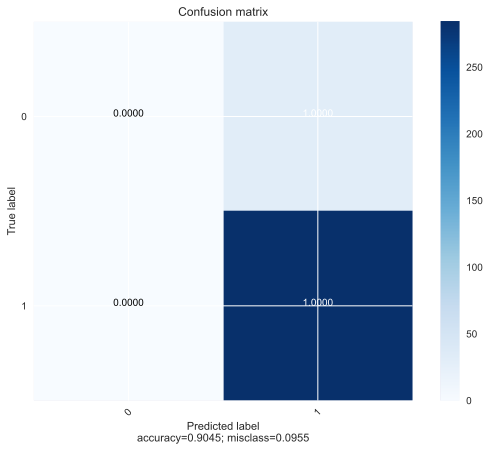

In [261]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
params = {'n_neighbors': np.arange(1, 20, 1),
'weights': ['uniform', 'distance']}

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

clf = GridSearchCV(knn, params, cv=rskf, scoring='f1_micro')

clf.fit(trainData, trainDependentVariables)

knn_model = KNeighborsClassifier(n_neighbors=clf.best_params_.get("n_neighbors"), weights = clf.best_params_.get("weights"))

print(clf.best_params_)
knn_model.fit(trainData, trainDependentVariables)

pred = knn_model.predict(testData)

from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Accuracy:",
      round(metrics.accuracy_score(testDependentVariables, pred), 5))

print()
print(metrics.classification_report(testDependentVariables, pred))

plot_confusion_matrix(cm=metrics.confusion_matrix(testDependentVariables, pred),
                      target_names=['0', '1'],
                      normalize=True)

Модель предсказала, что все ученики "сдали" экзамен, то есть получили итоговую оценку выше порога.Достаточно хорошая модель.

### RADIUS NEIGHBOURS

In [262]:
from sklearn.neighbors import RadiusNeighborsClassifier

In [263]:
(trainData, 
 testData, 
 trainDependentVariables, 
 testDependentVariables) = train_test_split(dt.drop(['pass'], axis=1),
                                            dt['pass'],
                                            test_size=0.3, 
                                            random_state=7)

In [264]:
rnr = RadiusNeighborsClassifier()
params = {'radius': np.arange(50, 100, 1)/10,
'weights': ['uniform','distance']}

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

clf = GridSearchCV(rnr, params, cv=rskf, scoring='f1_micro')

clf.fit(trainData, trainDependentVariables)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None),
             error_score=nan,
             estimator=RadiusNeighborsClassifier(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None,
                                                 outlier_label=None, p=2,
                                                 radius=1.0,
                                                 weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'radius': array([5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2,
       6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5,
       7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8,
       8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
                         'weights': ['un

In [265]:
rnr_model = RadiusNeighborsClassifier(radius=clf.best_params_.get("radius"), weights = clf.best_params_.get("weights"))

print(clf.best_params_)
rnr_model.fit(trainData, trainDependentVariables)
prediction =rnr_model.predict(testData)

{'radius': 5.0, 'weights': 'uniform'}


Accuracy: 0.90446

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        30
         1.0       0.90      1.00      0.95       284

    accuracy                           0.90       314
   macro avg       0.45      0.50      0.47       314
weighted avg       0.82      0.90      0.86       314



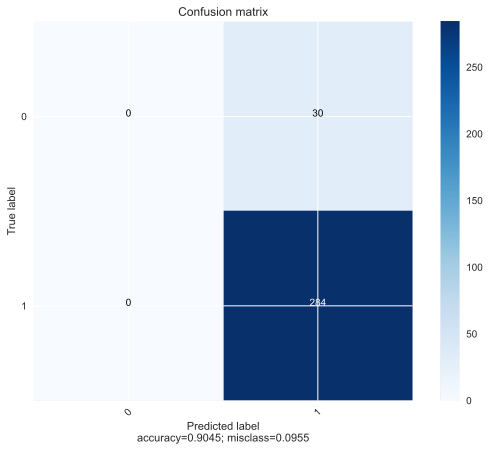

In [266]:
print("Accuracy:",
      round(metrics.accuracy_score(testDependentVariables, prediction), 5))

print()
print(metrics.classification_report(testDependentVariables, prediction))

plot_confusion_matrix(cm=metrics.confusion_matrix(testDependentVariables, prediction),
                      target_names=['0', '1'],
                      normalize=False)

Модель вновь всех поместила в класс сдавших, и даже так предсказание получилось достаточно точным.

### Логистическая регрессия

In [267]:
from sklearn.linear_model import LogisticRegression

In [268]:
lgr = LogisticRegression(max_iter=10000)
lgr.fit(trainData, trainDependentVariables)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [269]:
dt.columns

Index(['age', 'Medu', 'Fedu', 'studytime', 'failures', 'famrel', 'goout',
       'absences', 'alcohol', 'Por Subject', 'MS school', 'M sex', 'U address',
       'T Pstatus', 'yes schoolsup', 'yes famsup', 'yes paid',
       'yes activities', 'yes higher', 'yes internet', 'yes cheating',
       'reason__course', 'reason__home', 'reason__other', 'reason__reputation',
       'guardian__father', 'guardian__mother', 'guardian__other', 'pass'],
      dtype='object')

In [270]:
np.round(lgr.coef_,5)

array([[-0.99127, -0.47346,  0.54447,  0.15562, -1.92927, -0.07451,
        -1.49135,  1.22848, -0.33483,  1.94768, -0.38317,  0.69684,
         0.36018, -0.1581 ,  0.11145, -0.03108,  0.60969, -0.13545,
         0.74727,  0.4447 , -0.39369,  0.13035,  0.03569, -0.23841,
         0.0727 , -0.2811 , -0.1739 ,  0.45533]])

In [271]:
preds = lgr.predict(testData)

Accuracy: 0.91083

              precision    recall  f1-score   support

         0.0       0.67      0.13      0.22        30
         1.0       0.92      0.99      0.95       284

    accuracy                           0.91       314
   macro avg       0.79      0.56      0.59       314
weighted avg       0.89      0.91      0.88       314



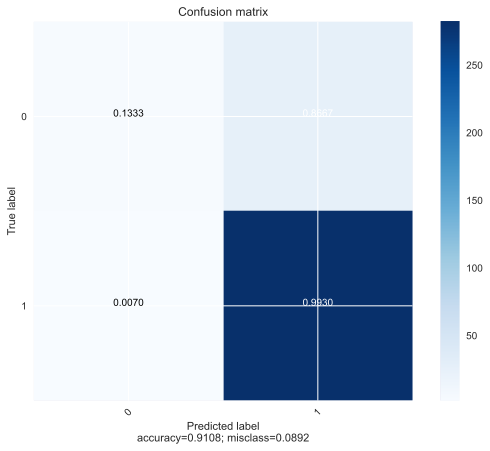

In [272]:
print("Accuracy:",
      round(metrics.accuracy_score(testDependentVariables, preds), 5))

print()
print(metrics.classification_report(testDependentVariables, preds))

plot_confusion_matrix(cm=metrics.confusion_matrix(testDependentVariables, preds),
                      target_names=['0', '1'],
                      normalize=True)

Данная модель уже не поместила всех в один класс, предсказание стало лучше по сравнению с предыдущими моделями.

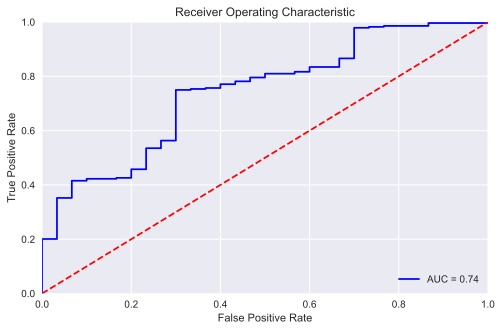

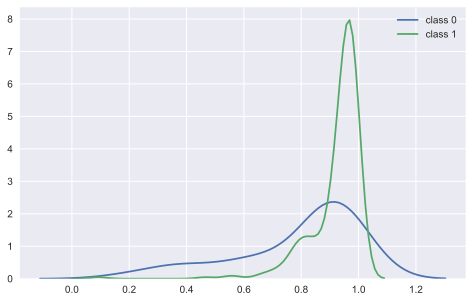

In [273]:
preds_prob = lgr.predict_proba(testData)[:,1]
    
plot_roc(testDependentVariables, preds_prob)
    
sns.distplot(preds_prob[testDependentVariables == 0], hist=False, rug=False, label='class 0')
sns.distplot(preds_prob[testDependentVariables == 1], hist=False, rug=False, label='class 1')
plt.legend()
plt.show()


Показатель AUC и accuracy близки к единице, значит модель неплохая.

### Decision Tree

In [274]:
from sklearn.tree import DecisionTreeClassifier

In [275]:
skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

In [276]:
dtree_model = DecisionTreeClassifier(max_depth=5)

In [277]:
splits = [(i, j) for (i,j) in skf.split(trainData, trainDependentVariables)]

Accuracy: 0.87671 
Balanced accuracy: 0.67641
              precision    recall  f1-score   support

         0.0       0.38      0.43      0.40        14
         1.0       0.94      0.92      0.93       132

    accuracy                           0.88       146
   macro avg       0.66      0.68      0.67       146
weighted avg       0.88      0.88      0.88       146

Accuracy: 0.90411 
Balanced accuracy: 0.62771
              precision    recall  f1-score   support

         0.0       0.50      0.29      0.36        14
         1.0       0.93      0.97      0.95       132

    accuracy                           0.90       146
   macro avg       0.71      0.63      0.66       146
weighted avg       0.89      0.90      0.89       146

Accuracy: 0.85616 
Balanced accuracy: 0.60119
              precision    recall  f1-score   support

         0.0       0.27      0.29      0.28        14
         1.0       0.92      0.92      0.92       132

    accuracy                           0.86 

Accuracy: 0.87671 
Balanced accuracy: 0.61255
              precision    recall  f1-score   support

         0.0       0.33      0.29      0.31        14
         1.0       0.93      0.94      0.93       132

    accuracy                           0.88       146
   macro avg       0.63      0.61      0.62       146
weighted avg       0.87      0.88      0.87       146

Accuracy: 0.86986 
Balanced accuracy: 0.57684
              precision    recall  f1-score   support

         0.0       0.27      0.21      0.24        14
         1.0       0.92      0.94      0.93       132

    accuracy                           0.87       146
   macro avg       0.60      0.58      0.58       146
weighted avg       0.86      0.87      0.86       146

Accuracy: 0.87671 
Balanced accuracy: 0.58063
              precision    recall  f1-score   support

         0.0       0.30      0.21      0.25        14
         1.0       0.92      0.95      0.93       132

    accuracy                           0.88 


Accuracy: 0.89041 
Balanced accuracy: 0.62013
              precision    recall  f1-score   support

         0.0       0.40      0.29      0.33        14
         1.0       0.93      0.95      0.94       132

    accuracy                           0.89       146
   macro avg       0.66      0.62      0.64       146
weighted avg       0.88      0.89      0.88       146



[Text(233.82857142857142, 249.15, 'X[4] <= 0.167\ngini = 0.173\nsamples = 584\nvalue = [56, 528]'),
 Text(116.91428571428571, 203.85000000000002, 'X[9] <= 0.5\ngini = 0.102\nsamples = 481\nvalue = [26, 455]'),
 Text(58.457142857142856, 158.55, 'X[11] <= 0.5\ngini = 0.192\nsamples = 186\nvalue = [20, 166]'),
 Text(31.885714285714286, 113.25, 'X[27] <= 0.5\ngini = 0.276\nsamples = 103\nvalue = [17, 86]'),
 Text(21.257142857142856, 67.94999999999999, 'X[2] <= 0.625\ngini = 0.253\nsamples = 101\nvalue = [15, 86]'),
 Text(10.628571428571428, 22.649999999999977, 'gini = 0.34\nsamples = 46\nvalue = [10, 36]'),
 Text(31.885714285714286, 22.649999999999977, 'gini = 0.165\nsamples = 55\nvalue = [5, 50]'),
 Text(42.51428571428571, 67.94999999999999, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(85.02857142857142, 113.25, 'X[6] <= 0.875\ngini = 0.07\nsamples = 83\nvalue = [3, 80]'),
 Text(63.77142857142857, 67.94999999999999, 'X[6] <= 0.625\ngini = 0.027\nsamples = 74\nvalue = [1, 73]'),
 Text

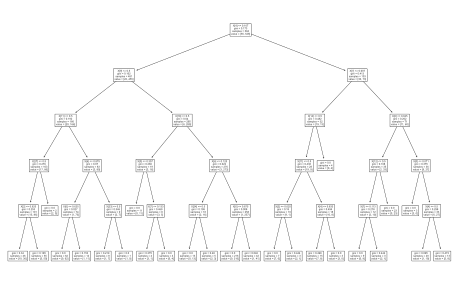

In [278]:
for train_index, test_index in splits:
    dtree_model.fit(trainData.iloc[train_index], trainDependentVariables.iloc[train_index]) 
    preds = dtree_model.predict(trainData.iloc[test_index])
    print("Accuracy:",
      round(metrics.accuracy_score(trainDependentVariables.iloc[test_index], preds), 5),
     '\nBalanced accuracy:',
     round(metrics.balanced_accuracy_score(trainDependentVariables.iloc[test_index], preds), 5))
    print(metrics.classification_report(trainDependentVariables.iloc[test_index], preds))
    
plot_tree(dtree_model) 

Посмотрим, каку нас дерево предсказывает оценку ученикам (пройдемся по одной из веток).
Первый признак failures, если оно мало, то мы смотрим на признак absences. Если absences мало, то мы смотрим на признак goout. Если goout мало, то смотрим на age. Если возраст мал, то смотрим на признак failures вновь, если он мал, то предсказываем нашему ученику сдал.

Сделаем подбор параметров

In [283]:
dtree_model = DecisionTreeClassifier()
params = {'max_depth': np.arange(5,21),
          'min_samples_split': np.arange(2, 31),
          'min_samples_leaf': np.arange(1, 16)}

clf = GridSearchCV(dtree_model, params, cv=skf, scoring='f1_micro', n_jobs=-1)

In [284]:
clf.fit(dt.drop(['pass'], axis=1), dt['pass'])

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0....
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  

In [285]:
clf.best_score_

0.9151269782848729

In [286]:
clf.best_params_

{'max_depth': 5, 'min_samples_leaf': 15, 'min_samples_split': 2}

In [287]:
dtree_model = DecisionTreeClassifier(**clf.best_params_)
dtree_model.fit(trainData, trainDependentVariables)

preds = dtree_model.predict(testData)

Accuracy: 0.92038 
Balanced accuracy: 0.59824

              precision    recall  f1-score   support

         0.0       0.86      0.20      0.32        30
         1.0       0.92      1.00      0.96       284

    accuracy                           0.92       314
   macro avg       0.89      0.60      0.64       314
weighted avg       0.92      0.92      0.90       314



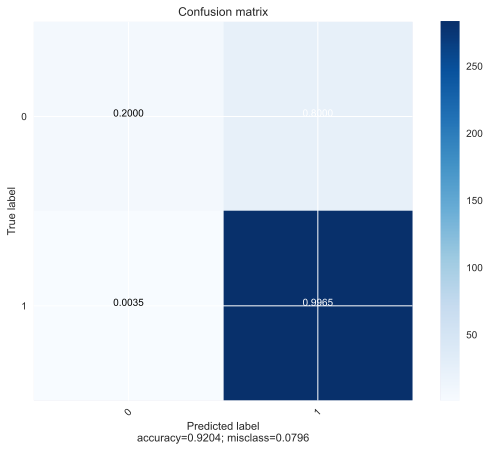

In [288]:
print("Accuracy:",
      round(metrics.accuracy_score(testDependentVariables, preds), 5),
     '\nBalanced accuracy:',
     round(metrics.balanced_accuracy_score(testDependentVariables, preds), 5))

print()
print(metrics.classification_report(testDependentVariables, preds))

plot_confusion_matrix(cm=metrics.confusion_matrix(testDependentVariables, preds),
                      target_names=['0', '1'],
                     normalize=True)

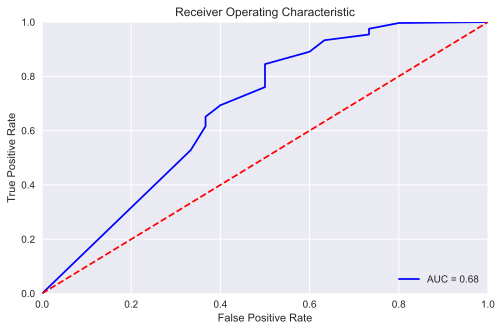

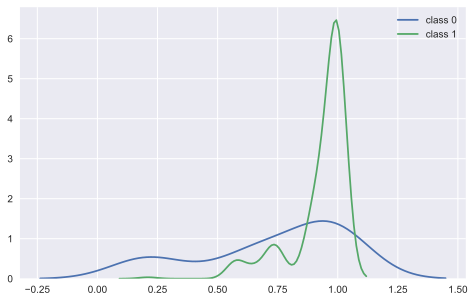

In [290]:
preds_prob = dtree_model.predict_proba(testData)[:,1]
    
plot_roc(testDependentVariables, preds_prob)
    
sns.distplot(preds_prob[testDependentVariables == 0], hist=False, rug=False, label='class 0')
sns.distplot(preds_prob[testDependentVariables == 1], hist=False, rug=False, label='class 1')
plt.legend()
plt.show()


Подбор параметров дал хорошую модель с высокой accuracy.

Бинарные классификаторы хорошо предсказывали итоговую оценку ученика, скорее всего потому что реальные оценки учеников таковы, что большинство можно поместить в класс сдавших. Многие модели предсказывали всем ученикам оценку 1, и при этом их accuracy все равно была высока(больше 90 процентов)

### Многоклассовая классификация

Сделаем наш датасет подготовленным к многоклассовой классификации.

In [291]:
dt = data.copy(deep=True)
dt.loc[(dt['G3'] >= 0.90), 'grade'] = 3
dt.loc[(dt['G3'] >= 0.70) & (dt['G3'] < 0.90), 'grade'] = 2
dt.loc[(dt['G3'] >= 0.40) & (dt['G3'] < 0.70), 'grade'] = 1
dt.loc[(dt['G3'] < 0.40), 'grade'] = 0
dt.drop(['G1', 'G3'], axis=1, inplace=True)

### KNN classifier

In [292]:
(trainData, 
 testData, 
 trainDependentVariables, 
 testDependentVariables) = train_test_split(dt.drop(['grade'], axis=1),
                                            dt['grade'],
                                            test_size=0.3, 
                                            random_state=7)

In [293]:
knn = KNeighborsClassifier()
params = {'n_neighbors': np.arange(1, 20, 1),
'weights': ['uniform', 'distance']}

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

clf = GridSearchCV(knn, params, cv=rskf, scoring='f1_micro')

clf.fit(trainData, trainDependentVariables)

knn_model = KNeighborsClassifier(n_neighbors=clf.best_params_.get("n_neighbors"), weights = clf.best_params_.get("weights"))

print(clf.best_params_)
knn_model.fit(trainData, trainDependentVariables)

pred = knn_model.predict(testData)

{'n_neighbors': 19, 'weights': 'uniform'}


Accuracy: 0.64968

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        30
         1.0       0.68      0.92      0.78       199
         2.0       0.50      0.29      0.37        73
         3.0       0.00      0.00      0.00        12

    accuracy                           0.65       314
   macro avg       0.29      0.30      0.29       314
weighted avg       0.54      0.65      0.58       314



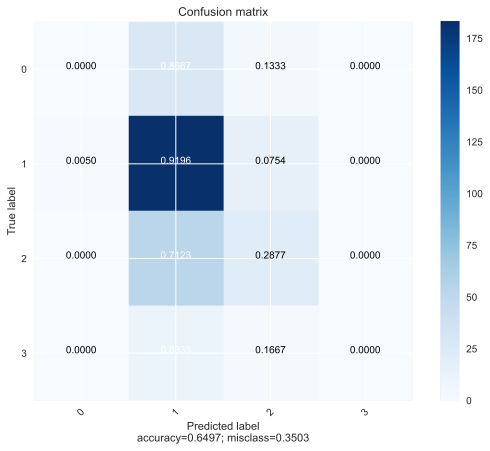

In [294]:

print("Accuracy:",
      round(metrics.accuracy_score(testDependentVariables, pred), 5))

print()
print(metrics.classification_report(testDependentVariables, pred))

plot_confusion_matrix(cm=metrics.confusion_matrix(testDependentVariables, pred),
                      target_names=['0', '1', '2', '3'],
                      normalize=True)

Модель замечательно предсказывает класс 1, что не скажешь о классе 0, 2, 3. Модель всех определила в средние два класса, что не катастрофично, но хотелось бы улучшить качетсво модели.

### Radius Neighbors

In [310]:
rnr = RadiusNeighborsClassifier()
params = {'radius': np.arange(50, 100, 1)/10,
'weights': ['uniform', 'distance']}


rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)


clf = GridSearchCV(rnr, params, cv=rskf, scoring='f1_micro')

In [311]:
clf.fit(trainData, trainDependentVariables)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None),
             error_score=nan,
             estimator=RadiusNeighborsClassifier(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None,
                                                 outlier_label=None, p=2,
                                                 radius=1.0,
                                                 weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'radius': array([5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2,
       6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5,
       7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8,
       8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
                         'weights': ['un

In [312]:
rnr_model = RadiusNeighborsClassifier(radius=clf.best_params_.get("radius"), weights = clf.best_params_.get("weights"))
print(clf.best_params_)
rnr_model.fit(trainData, trainDependentVariables)

{'radius': 5.0, 'weights': 'uniform'}


RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                          metric_params=None, n_jobs=None, outlier_label=None,
                          p=2, radius=5.0, weights='uniform')

In [313]:
prediction = rnr_model.predict(testData)

Accuracy: 0.63376 
Balanced accuracy: 0.25 
Multiclass f1-score: 
    micro: 0.63376 
    macro: 0.19396 
    weighted: 0.49169


Classification report:

              precision    recall  f1-score   support

         0.0    0.00000   0.00000   0.00000        30
         1.0    0.63376   1.00000   0.77583       199
         2.0    0.00000   0.00000   0.00000        73
         3.0    0.00000   0.00000   0.00000        12

    accuracy                        0.63376       314
   macro avg    0.15844   0.25000   0.19396       314
weighted avg    0.40165   0.63376   0.49169       314



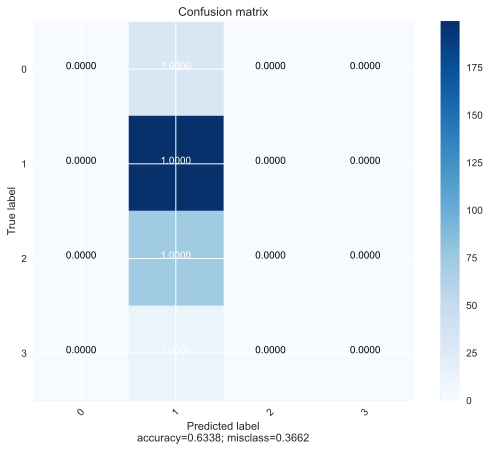

In [317]:
print("Accuracy:",
      round(metrics.accuracy_score(testDependentVariables, prediction), 5),
     '\nBalanced accuracy:',
     round(metrics.balanced_accuracy_score(testDependentVariables, prediction), 5), 
     '\nMulticlass f1-score:',
     '\n    micro:', round(metrics.f1_score(testDependentVariables, prediction, average='micro'), 5),
     '\n    macro:', round(metrics.f1_score(testDependentVariables, prediction, average='macro'), 5),
     '\n    weighted:', round(metrics.f1_score(testDependentVariables, prediction, average='weighted'), 5))

print('\n\nClassification report:\n')
print(metrics.classification_report(testDependentVariables, prediction, digits=5))

plot_confusion_matrix(cm=metrics.confusion_matrix(testDependentVariables, prediction),
                      target_names=['0', '1', '2', '3'],
                      normalize=True)

Данная модель просто определяет всех учеников в класс"1", из-за этого ее accuracy всего лишь 0,6338.

### Логистическая регрессия

In [299]:
lgr = LogisticRegression(max_iter=10000)
lgr.fit(trainData, trainDependentVariables)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy: 0.64968

              precision    recall  f1-score   support

         0.0       0.50      0.17      0.25        30
         1.0       0.68      0.86      0.76       199
         2.0       0.52      0.38      0.44        73
         3.0       0.00      0.00      0.00        12

    accuracy                           0.65       314
   macro avg       0.43      0.35      0.36       314
weighted avg       0.60      0.65      0.61       314



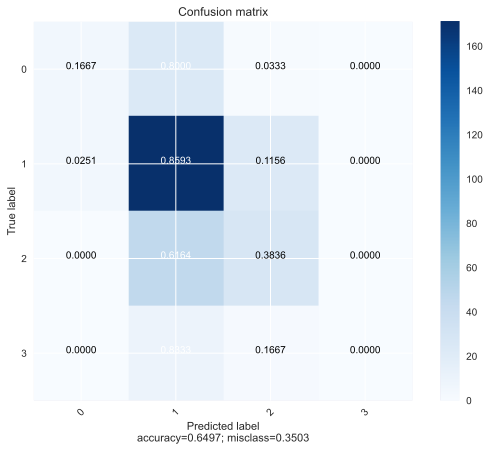

In [300]:
preds = lgr.predict(testData)
print("Accuracy:",
      round(metrics.accuracy_score(testDependentVariables, preds), 5))

print()
print(metrics.classification_report(testDependentVariables, preds))

plot_confusion_matrix(cm=metrics.confusion_matrix(testDependentVariables, preds),
                      target_names=['0', '1', '2', '3'],
                      normalize=True)

Логистическая модель схожего качества с двумя предыдущими, она поместила большинство учеников в два средних класса.

### Дерево решений

In [301]:
decision_tree = DecisionTreeClassifier()
skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
scores_dtree_5 = cross_val_score(dtree_model, dt.drop(['grade'], axis=1), dt['grade'], cv=skf, scoring='f1_micro')
score_dtree_5 = np.mean(scores_dtree_5)
print(score_dtree_5)


0.6243421052631579


In [302]:
dtree_model = DecisionTreeClassifier()
params = {'max_depth': np.arange(5,21),
          'min_samples_split': np.arange(2, 31),
          'min_samples_leaf': np.arange(1, 16)}

clf = GridSearchCV(dtree_model, params, cv=skf, scoring='f1_micro', n_jobs=-1)


In [303]:
clf.fit(dt.drop(['grade'], axis=1), dt['grade'])

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0....
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  

In [304]:
clf.best_score_

0.6224889584100111

In [305]:
clf.best_params_

{'max_depth': 7, 'min_samples_leaf': 13, 'min_samples_split': 30}

In [306]:
dtree_model = DecisionTreeClassifier(**clf.best_params_)
dtree_model.fit(trainData, trainDependentVariables)

scores_dtree_best = cross_val_score(dtree_model, dt.drop(['grade'], axis=1), dt['grade'], cv=skf, scoring='f1_micro')

score_dtree_best = np.mean(scores_dtree_best)

print(score_dtree_best)

preds = dtree_model.predict(testData)

0.6142763157894737


Accuracy: 0.59554 
Balanced accuracy: 0.32407 
Multiclass f1-score: 
    micro: 0.59554 
    macro: 0.33803 
    weighted: 0.55402


Classification report:

              precision    recall  f1-score   support

         0.0    0.66667   0.26667   0.38095        30
         1.0    0.65079   0.82412   0.72727       199
         2.0    0.30000   0.20548   0.24390        73
         3.0    0.00000   0.00000   0.00000        12

    accuracy                        0.59554       314
   macro avg    0.40437   0.32407   0.33803       314
weighted avg    0.54589   0.59554   0.55402       314



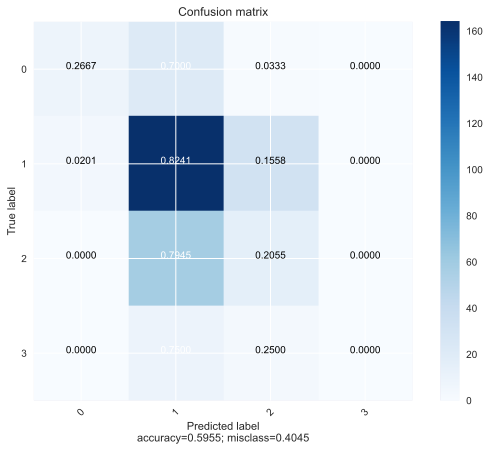

In [307]:
print("Accuracy:",
      round(metrics.accuracy_score(testDependentVariables, preds), 5),
     '\nBalanced accuracy:',
     round(metrics.balanced_accuracy_score(testDependentVariables, preds), 5), 
     '\nMulticlass f1-score:',
     '\n    micro:', round(metrics.f1_score(testDependentVariables, preds, average='micro'), 5),
     '\n    macro:', round(metrics.f1_score(testDependentVariables, preds, average='macro'), 5),
     '\n    weighted:', round(metrics.f1_score(testDependentVariables, preds, average='weighted'), 5))

print('\n\nClassification report:\n')
print(metrics.classification_report(testDependentVariables, preds, digits=5))

plot_confusion_matrix(cm=metrics.confusion_matrix(testDependentVariables, preds),
                      target_names=['0', '1', '2', '3'],
                     normalize=True)

Итог по многоклассовой классификации.
Общее качество моделей понизилось в многоклассовой классификации, так как предсказывать стало сложнее.
Дерево решений оказалось худшей моделью в многоклассовой классификации, примерная accuracy всех моделей была 0,65. Многие модели определяли всех учеников в два средних класса, что неплохо в нашем случае.

## Notes  
  
* Для оценки качества моделей используйте соответствующие задаче метрики, которые рассматривались на занятиях. Для кросс-валидации выберите ту метрику, которая кажется вам наиболее подходящей и аргументируйте свой выбор.  
  
  
* __Tip:__ Возможно, будет полезно решать задачи и строить модели отдельно для каждого предмета, а не для целого датасета.  
  
  
* __Бонусное задание:__ Попробуйте применить другие модели для решения задачи регресии или классификации. Например, Random Forest.